## Predicting Stock Market Data with Daily News Headlines

In this notebook we have tried various approaches to analyze the news headlines to predict the Stock Market.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruthv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruthv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1. Basic info on Dataframe - missing values, 0/1 count
### 2. Data Cleaning
### 3. Dictionaries for up/down
### 4. Sentiment analysis for up/down
### 5. N-Grams - Rutvik
### 6. Visualizations - Rutvik
### 7. Feature extraction - bag of words / tf-idf

## Importing Data

We have imported the data from DJIA and Reddit news table, which consists of data from 2008 to 2016.

In [3]:
data = pd.read_csv(r'C:\Users\ruthv\stocknews\Combined_News_DJIA.csv')

In [4]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

### Basic Info on DataFrames

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
Date     1989 non-null object
Label    1989 non-null int64
Top1     1989 non-null object
Top2     1989 non-null object
Top3     1989 non-null object
Top4     1989 non-null object
Top5     1989 non-null object
Top6     1989 non-null object
Top7     1989 non-null object
Top8     1989 non-null object
Top9     1989 non-null object
Top10    1989 non-null object
Top11    1989 non-null object
Top12    1989 non-null object
Top13    1989 non-null object
Top14    1989 non-null object
Top15    1989 non-null object
Top16    1989 non-null object
Top17    1989 non-null object
Top18    1989 non-null object
Top19    1989 non-null object
Top20    1989 non-null object
Top21    1989 non-null object
Top22    1989 non-null object
Top23    1988 non-null object
Top24    1986 non-null object
Top25    1986 non-null object
dtypes: int64(1), object(26)
memory usage: 419.7+ KB


In [6]:
data.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

We can see  there are only 7 missing values, in the last 3 columns.

In [7]:
import nltk
import spacy

In [8]:
import spacy
nlp = spacy.load('en_core_web_sm') 

### Data Pre-Processing

We will do some basic pre processing for our text data. This will include:
1. Converting to lower case.
2. Removing the bold tags in the beginning
3. Removing the punctuation

After doing this, we concatenate all 25 columns containing headlines into one single column. We thus essentially get a clean corpus of text of top 25 headlines

In [9]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [10]:
data = data.apply(lambda x: x.astype(str).str.lower())

In [11]:
date = data["Date"]
label = data['Label']

In [12]:
del data['Date']
del data["Label"]

In [13]:
data = data.apply(lambda x: x.astype(str).str[1:])

In [14]:
data = data.apply(lambda x: x.astype(str).str.replace('[^\w\s]',''))

In [15]:
data['combined'] = data['Top1'] + ' ' + data['Top2'] + ' ' + data['Top3'] + ' ' + data['Top4'] + ' ' + data['Top5'] + ' ' + data['Top6'] + ' ' + data['Top7'] + ' ' + data['Top8'] + ' ' + data['Top9'] + ' ' + data['Top10'] + ' ' + data['Top11'] + ' ' + data['Top12'] + ' ' + data['Top13'] + ' ' + data['Top14'] + ' ' + data['Top15'] + ' ' + data['Top16'] + ' ' + data['Top17'] + ' ' + data['Top18'] + ' ' + data['Top19'] + ' ' + data['Top20'] + ' ' + data['Top21'] + ' ' + data['Top22'] + ' ' + data['Top23'] + ' ' + data['Top24'] + ' ' + data['Top25']

In [16]:
del data['Top1']
del data['Top2']
del data['Top3']
del data['Top4']
del data['Top5']
del data['Top6']
del data['Top7']
del data['Top8']
del data['Top9']
del data['Top10']
del data['Top11']
del data['Top12']
del data['Top13']
del data['Top14']
del data['Top15']
del data['Top16']
del data['Top17']
del data['Top18']
del data['Top19']
del data['Top20']
del data['Top21']
del data['Top22']
del data['Top23']
del data['Top24']
del data['Top25']

In [17]:
data['Date'] = date
data['Label'] = label

In [18]:
data.head()

,combined,Date,Label
0,georgia downs two russian warplanes as countri...,2008-08-08,0
1,why wont america and nato help us if they wont...,2008-08-11,1
2,remember that adorable 9yearold who sang at th...,2008-08-12,0
3,us refuses israel weapons to attack iran repo...,2008-08-13,0
4,all the experts admit that we should legalise ...,2008-08-14,1


In [19]:
data['Label'].value_counts()

1    1065
0     924
Name: Label, dtype: int64

In [20]:
data['Date'].max()

'2016-07-01'

In [21]:
data['Date'].min()

'2008-08-08'

In [22]:
data[data.Date.str.contains('2008-08-08')].combined.tolist()

['georgia downs two russian warplanes as countries move to brink of war breaking musharraf to be impeached russia today columns of troops roll into south ossetia footage from fighting youtube russian tanks are moving towards the capital of south ossetia which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity un official says  this is sick a three year old was raped and they do nothing 150 russian tanks have entered south ossetia whilst georgia shoots down two russian jets breaking georgia invades south ossetia russia warned it would intervene on sos side the enemy combatent trials are nothing but a sham salim haman has been sentenced to 5 12 years but will be kept longer anyway just because they feel like it georgian troops retreat from s osettain capital presumably leaving several hundred people killed video did the us prep georgia for war with russia rice gives green light for israel to attack iran says us has no veto over israeli

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 3 columns):
combined    1989 non-null object
Date        1989 non-null object
Label       1989 non-null object
dtypes: object(3)
memory usage: 46.7+ KB


### Up and Down dictionaries

We will now split the data into up market and down market. After doing this, we will tokenize the words and get the frequency for most repeated words for both up and down market. These are our up and down dictionaries.

In [24]:
ups = data[data.Label == '1']
ups_corpus = ups['combined'].tolist()

In [25]:
downs = data[data.Label == '0']
downs_corpus = downs['combined'].tolist()

In [26]:
ups_corpus_str = ''.join(ups_corpus)
downs_corpus_str = ''.join(downs_corpus)

In [27]:
stop_words = set(stopwords.words('english'))

In [28]:
word_tokens_up = word_tokenize(ups_corpus_str)
filtered_sentence_ups = [w for w in word_tokens_up if not w in stop_words] 

In [29]:
word_tokens_down = word_tokenize(downs_corpus_str)  
filtered_sentence_downs = [w for w in word_tokens_down if not w in stop_words]

In [30]:
ups_counter = Counter(filtered_sentence_ups)
print(ups_counter.most_common(10))

[('us', 1975), ('says', 1384), ('new', 1102), ('government', 1035), ('police', 956), ('people', 944), ('world', 844), ('israel', 837), ('years', 823), ('war', 813)]


In [31]:
downs_counter = Counter(filtered_sentence_downs)
print(downs_counter.most_common(10))

[('us', 1759), ('says', 1162), ('new', 1024), ('government', 876), ('people', 862), ('police', 848), ('world', 796), ('years', 750), ('war', 719), ('israel', 696)]


### Sentiment Analysis - Using TextBlob

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ruthv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
headlines = ['positive vibes', 'negative shit']
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

print(results[:3])

[{'neg': 0.0, 'neu': 0.217, 'pos': 0.783, 'compound': 0.5574, 'headline': 'positive vibes'}, {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.8074, 'headline': 'negative shit'}]


In [34]:
from textblob import TextBlob

In [35]:
def sentiments(x):
    mylist = x['combined']
    polarity=[]
    subjectivity=[]
    for i in mylist:
        testimonial = TextBlob(''.join(i))
        polarity.append(testimonial.sentiment.polarity)
        subjectivity.append(testimonial.subjectivity)
    x['polarity'] = polarity
    x['subjectivity'] = subjectivity
    return x

In [36]:
analyze_sentiments = sentiments(data)

In [37]:

analyze_sentiments.head()

,combined,Date,Label,polarity,subjectivity
0,georgia downs two russian warplanes as countri...,2008-08-08,0,-0.048568,0.267549
1,why wont america and nato help us if they wont...,2008-08-11,1,0.109325,0.374806
2,remember that adorable 9yearold who sang at th...,2008-08-12,0,-0.044302,0.536234
3,us refuses israel weapons to attack iran repo...,2008-08-13,0,0.005842,0.364021
4,all the experts admit that we should legalise ...,2008-08-14,1,0.035469,0.375099


In [38]:
import matplotlib
import matplotlib.pyplot as plt
x=analyze_sentiments['polarity']
y = analyze_sentiments['subjectivity']
label = [int(x) for x in analyze_sentiments['Label']]
colors = ['Red','Green']
fig = plt.figure(figsize=(8,8))
plt.scatter(y, x, c=label, cmap=matplotlib.colors.ListedColormap(colors))



In [39]:
len(analyze_sentiments[(analyze_sentiments['Label'] == '0') & (analyze_sentiments['polarity'] < 0)])

319

In [40]:
len(analyze_sentiments[(analyze_sentiments['Label'] == '0')])

924

In [41]:
len(analyze_sentiments[(analyze_sentiments['Label'] == '1') & (analyze_sentiments['polarity'] > 0)])

722

In [42]:
len(analyze_sentiments[analyze_sentiments['Label'] == '1'])

1065

Thus, we can see that the sentiments getting negative when the stock market goes down is about 30%, and the sentiment being positive when the stock market goes up is about 70%, which indicates that when it is a positive sentiment, there is a high probability that the stock market is going to increase.

In [43]:
sample=data[:1].combined.tolist()

In [44]:
#doc = ''.join(sample)

In [45]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [46]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(binary=False) # we cound ignore binary=False argument since it is default
vec.fit(sample)

import pandas as pd
a=pd.DataFrame(vec.transform(sample).toarray(), columns=sorted(vec.vocabulary_.keys()))

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(sample)

import pandas as pd
a=pd.DataFrame(vec.transform(sample).toarray(), columns=sorted(vec.vocabulary_.keys()))
a=a.transpose()
a.columns=['idf']
a=a.sort_values('idf', ascending=False)

In [49]:
a.head()

,idf
of,0.337385
the,0.337385
georgia,0.276042
ossetia,0.214700
to,0.214700


In [50]:
sample_str=''.join(sample)
idf_score = word_tokenize(sample_str)  
filtered_idf = [w for w in idf_score if not w in stop_words]

res = Counter(filtered_idf)
print(res.most_common(10))

[('georgia', 9), ('south', 7), ('ossetia', 7), ('russian', 5), ('war', 5), ('russia', 4), ('us', 4), ('iran', 4), ('invades', 3), ('israeli', 3)]


# Named Entity Recognition

In [51]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [52]:
nlp.entity


In [53]:
sample_str = ""
filtered_sentence_ups
sample_str = sample_str + filtered_sentence_ups[0]
sample_str

'wont'

## NER for up market

In [54]:
N = 1000000
doc_up = nlp(ups_corpus_str[1:N])


In [55]:
for i in doc_up.ents:
    print(i.label_, i.text)

PERSON hy
GPE america
ORG nato
GPE iraq
PERSON bush
NORP georgian
NORP jewish
NORP georgian
NORP israeli
GPE russia
NORP georgian
NORP russians
GPE russia
GPE new zealand
GPE iraq
GPE russia
NORP israeli
GPE georgia
NORP american
NORP georgian
GPE russia
GPE georgia
GPE us
ORDINAL first
GPE india
GPE us
LOC arctic
GPE jerusalem
NORP arab
NORP french
GPE phelps
GPE israel
GPE us
NORP georgian
NORP russian
NORP georgian
GPE montreal
GPE canada
DATE saturday
GPE china
GPE south ossetia
NORP israeli
GPE russia
GPE the united states
GPE georgia
GPE russia
GPE russia
GPE south osetia
CARDINAL 89
NORP russian
NORP swedish
PERSON ara abrahamian
GPE russia
DATE only 44
CARDINAL 2000
CARDINAL 9
GPE pakistan
ORG cia
NORP muslim
GPE poland
GPE us
NORP russians
PERSON tblisi bet
GPE russia
NORP south ossetian
GPE moscow
DATE months ago
GPE georgia
PERSON russias
GPE georgia
PERSON bakassi peninsula
GPE us
GPE poland
GPE us
GPE russia
NORP georgian
ORG forecast georgian
DATE 2 days
GPE georgia
GPE u

GPE baghdad
NORP russian
PERSON putin
GPE israel
PERSON olmert
GPE israel
NORP mexican
GPE mexico
GPE america
NORP french muslims
NORP catholic
GPE iraq
GPE india
NORP iranian
NORP ukranian
PERSON wmds venezuela
GPE russia
CARDINAL 35
GPE pakistan
GPE moscow
NORP georgian
GPE india
CARDINAL more than 147
CARDINAL 55
CARDINAL 197
ORG india zimbabwe farm animals
NORP pakistani
GPE afghanistan
ORG taliban
GPE uk
GPE pakistan
CARDINAL 150
GPE india
GPE netherlands
GPE china
GPE america
PERSON olmert disavows
GPE israel
GPE ecuador
PERSON paul krugman
WORK_OF_ART nobel economics prize europe
NORP hindu
NORP christians
LOC europe
CARDINAL 23 trillion
CARDINAL almost 3
WORK_OF_ART nobel prize
PERSON paul krugman
LOC africa
GPE beijing
CARDINAL 800000
GPE china
NORP jamaican
MONEY millions of us dollars
DATE every day
NORP jamaican
PERSON highcalibre
CARDINAL 42day
ORG eu
DATE three decades
GPE indonesia
GPE north korea
ORG un
LOC africa
DATE this month
GPE delhi
GPE venezuela
FAC mcdonalds
GP

PERSON berlusconi
NORP venezuelans
PERSON chvez
NORP pakistani
NORP hindu
NORP zionists
ORG mossad
GPE mumbai
GPE zimbabwe
NORP canadian
GPE iran
PERSON thomas l friedman
GPE canada
ORG fbi
ORG the office of liberty
NORP saudi
GPE israel
GPE iran
GPE bombay
DATE 20th and 21st century
GPE hebron
ORG coke
GPE mumbai
GPE russia
GPE panama
CARDINAL one
GPE mumbai
CARDINAL 75
GPE congo
MONEY 90 yr
NORP jewish
NORP palestinian
NORP canadian
NORP australian
GPE iraq
NORP somali
GPE zardari
GPE pakistan
NORP russian
GPE panama
ORDINAL first
EVENT world war ii
GPE us
CARDINAL four
PERSON cow dung
DATE the year
NORP german
NORP swiss
GPE india
GPE pakistan
NORP swiss
GPE canada
NORP pakistanindian
NORP pakistans
CARDINAL 29
GPE pakistan
NORP jordanian
GPE india
ORG pakistan canada
CARDINAL at least 22
GPE pakistan
GPE germany
QUANTITY 5 blackwater guards
FAC carter center guinea worm disease
NORP vaticans
NORP abusechinese
NORP israeli
NORP jews
NORP palestinian
GPE japan
GPE america
GPE japan
F

GPE iraq
PERSON bush
DATE three years
QUANTITY 20 tonnes
GPE italy
ORG cia
NORP irans
GPE uk
ORG pun tweaks chinas online censors
ORG defense
PERSON robert gates
NORP pakistani
CARDINAL one
CARDINAL one
NORP mayan
ORG el mirador
GPE guatemala
NORP muslim
NORP british
GPE germany
GPE uk
GPE angola
CARDINAL 83
ORG beth israel hospital
DATE 22day
GPE gaza strip
CARDINAL 1434
CARDINAL 960
CARDINAL 239
CARDINAL 235
ORG sony
GPE france
GPE darfur
NORP american
GPE us
LOC south china sea
GPE china
GPE us
DATE the weekend
GPE venice
ORG reuters
NORP british
GPE iraq
NORP dutch
ORG anne frank house museum
NORP jews
GPE israel
GPE gaza
ORG hummus
GPE darfur
PERSON batman
ORG sinn fein
ORDINAL first
NORP republican
NORP british
NORP hezbollah
GPE mexico
PERSON chavez
GPE japan
NORP n korean
QUANTITY 300km
GPE new zealand
GPE switzerland
ORDINAL first
CARDINAL 52000
NORP american
ORG irs
GPE uk
GPE iraq
NORP german
NORP iraqi
ORG pen
GPE us
NORP americans
NORP arab
NORP american
NORP californian
N

GPE syria
ORG taliban
GPE afghanistan
ORG nato
GPE south korea
CARDINAL 19
NORP british
TIME 24 hours
GPE gaza
CARDINAL roughly 8000
CARDINAL about 10
CARDINAL hundreds of thousands
GPE ghana
GPE north korea
GPE darfur
NORP muslims
GPE toronto
NORP palestinians
NORP israeli
GPE gaza
CARDINAL addiction 1 million
NORP pakistans
ORG northwest
GPE britain
NORP turbans
GPE darfur
NORP saudi
CARDINAL three
NORP israeli
GPE gaza
GPE israel
GPE china
GPE us
GPE portugal
DATE the day
PERSON alvaro colom
ORG the world health organization
NORP australian
LANGUAGE english
NORP russian
PERSON kellermann
ORG freddie mac
MONEY over 50 billion dollars
NORP zionist
NORP israeli
ORG hersh
ORG abu
DATE monthly
PERSON john yoo taliban
CARDINAL 86
NORP afghan
ORDINAL third
GPE guatemala
DATE spanish 4 days
NORP islamic
NORP somali
GPE mogadishu
GPE somalia
ORG sri lanka army
DATE today
ORG oecd
GPE denmark
GPE finland
GPE netherlands
CARDINAL at least 45
PERSON netanyahu
GPE us
GPE israel
GPE the west bank

GPE gaza
CARDINAL one
GPE france
GPE iran
NORP iranian
PERSON naomi klein
GPE israel
CARDINAL two
CARDINAL 6
GPE rngaza
GPE israel
GPE us
GPE israel
ORG hamas
LOC east beijing
ORG airbus
CARDINAL 153
DATE this week
ORDINAL first
GPE us
ORG european union
PERSON antonio tajani
ORG blacklistuganda
CARDINAL 129
NORP muslim
LOC western china
ORG irans revolutionary guard
DATE 03
CARDINAL at least 140
ORG uighurhan
LOC western chinas
GPE xinjiang
GPE china
DATE 33 years
NORP israeli
PERSON marwa
PERSON marwa
CARDINAL eighteen
TIME less than 30 seconds
NORP israeli
NORP jewish
NORP palestinian
GPE israel
GPE honduras
DATE a bad week
GPE israel
GPE israel
GPE china
NORP afghanistans
ORG goldman sachs
DATE july 4
GPE iran
ORG bbc
ORG cnn
ORG boeing
PRODUCT 757
GPE iran
GPE united states
GPE honduras
CARDINAL 10yearold
ORG red cross
CARDINAL about 30
NORP christian
CARDINAL 68
CARDINAL 140
GPE china
NORP britains
DATE sunday
CARDINAL 30
NORP coupwoman
DATE 1 year
NORP muslim
NORP islamist
CARDI

ORG house
PERSON clinton
PERSON nixon
GPE israel
GPE beijing
NORP greek
GPE malaysia
ORG yankees
GPE north korea
ORG white house
ORG north korea unchangedn rights group
ORG hamas
GPE israel
ORG bilin nonviolent
NORP israeli
NORP christians
ORG pakistann
WORK_OF_ART nobel prize
NORP palestinian
ORG fatah
ORDINAL first
ORG fatah
DATE 20 years
GPE south korea
ORG the center of chinas worst ethnic
NORP australian
NORP costa rican
GPE brazil
NORP german
NORP jews
EVENT the geneva conventions
DATE 60 years old
CARDINAL 194
PERSON london jewel
CARDINAL 66 million
NORP australian
GPE paris
NORP muslim
NORP burqini
GPE us
NORP french
ORDINAL first
DATE almost a century
GPE paris
DATE tuesday
PERSON campbell
NORP kenyan
PERSON knives clubs
CARDINAL hundreds
GPE uganda
NORP iraqi
DATE 2003
PERSON saddam
PERSON ma yingjeou
NORP european
CARDINAL 29
ORG democratic party
GPE the united states
GPE israel
DATE next thursday
NORP american
DATE 77day
GPE ssangyong
GPE korea
GPE japan
DATE second consecu

NORP australian
NORP french
CARDINAL at least 150
NORP afghan
CARDINAL 100
CARDINAL 100
CARDINAL 100
CARDINAL 3
ORG jamaicas gays
GPE israel
GPE palestine
PERSON bush
NORP honduran
NORP chinese
ORG the australia defence association
CARDINAL hundreds
NORP iranian
GPE afghanistan
NORP libyan
PERSON alqaida justine
CARDINAL 30
CARDINAL 21
NORP german
CARDINAL one
CARDINAL only 15
CARDINAL 2
GPE germanys
TIME last night
NORP french
NORP roman
CARDINAL 2
NORP german
PERSON arr
GPE india
PERSON peter johnson
PERSON lamb korma
TIME tonight
ORG eu
GPE pakistan
PRODUCT 760000
GPE new germany
CARDINAL two
GPE ireland guinea
CARDINAL at least 58
DATE years
PERSON richard reid
CARDINAL one
GPE iran
CARDINAL two
NORP honduran
DATE 45 days
GPE honduras
GPE cuba
NORP new egyptian
PERSON jamal mubarak
MONEY billions of pounds
CARDINAL thousands
NORP american
GPE egypt
NORP egyptian
ORG almasri alyom
CARDINAL 10 million
CARDINAL nearly 2 million
GPE india
GPE norway
GPE london
ORG the international ato

NORP palestinian
GPE pa
GPE us
GPE israel
GPE west bank
GPE ukraine
CARDINAL 109 763000
CARDINAL 34000
DATE last friday
CARDINAL 57
NORP afghan
CARDINAL 73
CARDINAL 13yearold
ORG schoolboy
ORG bnp
PERSON griffin
NORP pathan indians
CARDINAL three
GPE mexico city
ORG cbc
PERSON anne frank diary
NORP hezbollah
NORP islamists
GPE somalia
NORP kenyan
CARDINAL three
DATE next year
NORP islamic
GPE afghanistan
NORP islamic
NORP european
ORG taliban
NORP russian
NORP european
PERSON ho chi minh city
PERCENT 4114 percent
CARDINAL more than two million
DATE the last decade
ORG eu
ORG iaea
GPE iran
GPE chinaindia
NORP british
PERSON matthew hoh
DATE a few weeks ago
NORP afghan
PERSON yoani sanchez
DATE march
GPE colombia
GPE venezuela
NORP french
GPE britain
NORP british
CARDINAL 227
ORG cia
NORP muslim
GPE queensland
PERSON andrew fraser
GPE israel
GPE ukraine
CARDINAL 871037three
GPE uk
PERSON rupert murdoch
PERSON meta
PERSON mikhail kalashnikov
ORDINAL 90th
DATE today
DATE 62 years ago
GPE j

GPE russia
GPE chechnya
NORP mexican
NORP iraqi
NORP egyptian
NORP chinese
NORP pakistani
CARDINAL two
GPE gaza
NORP israeli
GPE japan
GPE futenma
NORP iranian
PERSON mir hossein
NORP irans
GPE mexico city
GPE china
GPE israel
NORP palestinian
GPE jerusalem
GPE germany
CARDINAL more than 20000
ORG us navy
DATE 2002
GPE japan
GPE japan
NORP mexican
CARDINAL 24
ORDINAL first
DATE 1966
NORP palestinian
GPE israel
NORP israeli
GPE israel
NORP palestinian
DATE the past few months
NORP british
GPE northern ireland
DATE 1970s hundreds
CARDINAL 225000
GPE haiti
NORP lithuanian
ORG cia
GPE iran
GPE russia
GPE the united states
GPE ukraine
GPE ukrainian
NORP canadian
PERSON philip
NORP jewish
GPE israel
DATE the past 20 years
NORP pakistans
NORP christian
QUANTITY 5m cocaine
ORG coke
GPE mexico
GPE sodano
GPE vatican
GPE us
GPE iran
CARDINAL two
NORP iraqi
DATE wednesday one day ahead of christmas eve
NORP countrys christian
NORP arab
NORP french
GPE algeria
NORP romanian
DATE 20 years ago
TIME 

GPE saudi arabia
FAC buckingham palace
NORP german
TIME tonight
GPE greece
NORP european
GPE britain
DATE 2015
GPE china
GPE the united states
NORP south african
ORG hamas
GPE dubai
ORG dubai assassins stole
CARDINAL six
GPE uk
GPE israel
GPE israel
NORP palestinians
NORP israeli
CARDINAL 12
NORP afghan
NORP british
NORP egyptian
QUANTITY more than three tonnes
CARDINAL 70
DATE 2009
DATE the worst year
DATE 30 years ago
ORG hamas
GPE uk
GPE us
ORG goldman
GPE greece
GPE france
GPE guinea
NORP japanese
GPE tokyo
ORDINAL third
GPE argentina
NORP british
GPE argentina
ORG mossad death squad
ORG hamas
GPE dubai
ORG ray goslings
ORDINAL first
EVENT world cup
DATE 2010
NORP russian
PRODUCT s300
GPE iran
GPE uk
PERSON obama
GPE iran
PERCENT 20 percent
PERSON bush
NORP british
ORG hamas
ORG hamas
GPE israel
PERSON mahmoud
GPE dubai
GPE israel
PERSON lieberman
GPE israel
GPE afghanistan
ORG taliban
ORG draw nato
NORP jews
GPE israel
CARDINAL half a million
ORG cia
DATE the 1960s
NORP hmong
GPE 

GPE new zealand
GPE new zealand
ORG fed
NORP dutch
GPE us
GPE srebrenica
ORDINAL first
CARDINAL three
GPE us
ORG denmark australia
GPE norway
GPE canada
GPE germany
GPE spain
CARDINAL two
ORG george cross
CARDINAL three
MONEY three million dollars
LOC africa
ORG pedophilia
GPE vatican
NORP french
PERSON sarkozy
GPE greece
GPE germany
DATE today
GPE israel
DATE wight
LOC mideast
GPE israel
GPE us
GPE mi5 britain
CARDINAL four
LOC middle east
NORP palestinian
DATE 24 months euro
GPE us
ORG congress
GPE germany
NORP germans
NORP somali
ORG hsbc
GPE argentina
PERSON sun nigeria
GPE libya
ORG khadaffi
GPE nigeria
CARDINAL 2
NORP christian
NORP muslim
GPE east jerusalem
CARDINAL nearly 55
GPE hong kong
DATE every year
GPE israel
DATE recent years
CARDINAL 17 billion
QUANTITY 12 million square meters
NORP jewish
ORG palestinian west bank
GPE india
NORP israeli
NORP british
GPE dubai
ORG jeremy
NORP paxman
PERSON interviews ann
GPE uk
GPE israel
NORP british
ORG hamas
GPE dubai
GPE britain
NOR

GPE london
NORP okinawans
GPE us
GPE okinawa
ORDINAL first
ORG eu
NORP irish
GPE greece
ORG eu
NORP greek
GPE portugal
GPE ireland
GPE italy
GPE spain
GPE greece
MONEY 120 billion euros
NORP german
NORP israeli
PERSON ehud olmert
NORP islamic
GPE turkey
ORG rnattack
GPE turkey
GPE ukraine
ORG parliament
DATE tuesday
GPE russia
ORG latters navy
DATE 2042
ORG the argentinian supreme court
PERSON kim jong ils
GPE seoul
LOC britain europe
LOC asia
NORP greek
ORG us coast guard
LOC the gulf of mexico
CARDINAL one
GPE historychina
DATE 2000
EVENT olympics
NORP palestinians
GPE israel
GPE israel
ORG cnn
DATE month
NORP israeli
ORG taliban
CARDINAL seven
DATE 2008
CARDINAL three
CARDINAL one
GPE uk
PERSON hooray
NORP israeli
GPE west bank
GPE spain
LOC europe
NORP israeli
DATE wednesday
GPE gaza
NORP palestinian
GPE vatican
QUANTITY about 017 square miles
GPE rome
PERSON benito mussolini
DATE 1929
GPE gaza
CARDINAL 4
NORP afghan
CARDINAL 90
CARDINAL 240
NORP eastern european
PERSON brown burka

ORDINAL first
CARDINAL 20000
NORP germans
CARDINAL more than half
NORP germans
DATE 11 years
CARDINAL 77
GPE london
DATE five years ago
GPE iran
CARDINAL 200 million
NORP jewish
NORP american
DATE the past 10 years
GPE uk
ORG the supreme court
GPE gaza
PERSON warsaw ghetto wall
PERSON kissinger
NORP chilean
PERSON allende
ORG the chilean army
PERSON rene schneider
DATE 1970
PERSON ueen elizabeth ii
ORDINAL first
ORG un
DATE 1957
GPE iraq
DATE 3 years
NORP russian
PERSON churcha lesson
ORG czarist times
DATE 76
NORP iranian
NORP palestinian
GPE gaza
ORG hamas
NORP european
ORG the european parliament
DATE this week
NORP ussian
CARDINAL 450000
CARDINAL zero
ORG uba
CARDINAL 52
PERSON john paul ii
DATE 1998
GPE hina
NORP belgian
ORG anadian court
GPE gaza
DATE daily
GPE israel
NORP israeli
GPE germany
ORDINAL third
GPE north korea
GPE iran
PERSON benjamin netanyahu
GPE israel
ORG twitter post
ORG hezbollah
CARDINAL 6
CARDINAL 80
NORP british
CARDINAL hundreds
ORG eu
ORG israel  

NORP iri

PRODUCT f35s
CARDINAL about 96 million
PERSON idel castro
NORP cuban
PERSON nicef
PERSON ewen mcgregor
CARDINAL millions
GPE pakistan
GPE asmania
DATE years
GPE russia
NORP israelis
GPE west bank
ORG eu
GPE haiti
GPE aljazeera
GPE haiti
DATE 6 months
PERSON idel castro
NORP afghan
NORP american
NORP afghan
PERSON rench riviera
NORP russian
GPE syria
ORG pakistan army rito
PERSON chvez
NORP israelis
GPE hebron
DATE one day
GPE rgentina
ORG google
ORG yahoo argentina
GPE egypt
ORG washington bc news
NORP iranian
PERSON carla brunisarkozy
GPE france
PERSON gordon brown
GPE germany
ORG gm
NORP julian
PERSON astro
GPE indonesia
DATE 5 years
GPE mosque
NORP german
GPE iraq
ORG roy  

GPE us
NORP americans
CARDINAL two
NORP indian
GPE london
ORG the home office register of forensic pathologists
PERSON tomlinson
NORP israelis
GPE hebron
NORP saudi
CARDINAL 100
CARDINAL six
GPE iraq
GPE afghanistan
PERSON ethan mccord ground troop
NORP wikileaks
DATE more than 7 years
NORP iraqis
NORP rmenian
N

NORP jewish
CARDINAL 4
DATE today
PERSON hosni mubaraks
ORDINAL first
DATE three decades ago
ORG the german green party
NORP democrats
NORP greens
DATE wednesday
CARDINAL seven
ORDINAL second
DATE just a few days
ORG new zeland red cross
CARDINAL 7 million
ORG the boston red sox
CARDINAL about 300 million
NORP american
GPE us
GPE china
DATE oday
NORP israeli
NORP palestinian
ORG the united states
DATE 1773
PERSON richard wagner
NORP israeli
EVENT the wagner festival
GPE bayreuth
GPE uk
GPE yemen
LOC north india
GPE china
GPE india
CARDINAL nearly two
CARDINAL five
DATE 1950
NORP ethiopian
NORP jews
GPE israel
NORP ethiopian
DATE the weekend
ORG badenwuerttemberg
WORK_OF_ART nobel peace prize 2010
PERSON liu xiaobo
GPE china
CARDINAL one
WORK_OF_ART the nobel peace prize
NORP chinese
PERSON liu xiaobo
GPE hinas
DATE 11 years
WORK_OF_ART the nobel peace prize
LANGUAGE hebrew
ORG interrogation supreme court
GPE canada
FAC camp capt
DATE 2006
ORDINAL first
NORP canadian
GPE afghanistan
GPE

GPE the united arab emirates
DATE monday
ORG ard
NORP new american
NORP israeli
CARDINAL billion
GPE brazil
GPE china
CARDINAL two
NORP israelis
GPE kosovo
GPE israel
GPE uk
NORP israeli
NORP palestinians
PERSON cartel hitman sa
GPE hariri
GPE lebanon
CARDINAL 32
NORP indian
GPE hanghai
ORG iran  

PERSON rupert murdoch
GPE iran
NORP colombian
NORP islamic
NORP ritish
GPE south africaemand
NORP wikileaks
PERSON julian
CARDINAL one
CARDINAL 3
GPE uganda
ORG uganda virus research institute
GPE marburg
GPE nambia
GPE germany
PERSON tom watson
NORP ulian
NORP swedish
NORP hinese
DATE a year
PERSON anna arden
NORP julian
GPE sweden
GPE afghanistan
GPE iraq
CARDINAL 300 million
ORG un
GPE myanmar
GPE mexicos
ORG cnn international rrest order
ORG wikileaks julian assange
GPE sweden
GPE hina
PERSON rench embassy
GPE tehran
NORP iranian
ORG regime security
ORG entagon
CARDINAL 2014
NORP afghan
GPE china
DATE weekly
DATE sunday
DATE this month
ORDINAL first
GPE zulu
GPE ong kong
ORDINAL first
DA

DATE tuesday
ORG norways aftenpostenh
NORP ulian
ORG the arizona shooting
LOC europe
GPE akistan
GPE us
GPE afghanistan
GPE us
GPE afghanistan
GPE pakistan
GPE orth korea
CARDINAL five
NORP chinese
LOC the brisbane river
DATE 2011
CARDINAL 78
GPE australia
GPE china
GPE china
MONEY hundreds of billions
PERSON queensland australia
QUANTITY 386000 sq miles
GPE uk
NORP eadly australian
GPE china
DATE the 21st century
GPE orth korea
CARDINAL five
GPE china
ORDINAL first
DATE years
PERSON queensland australia
DATE last week
ORG icelandic
ORG icelandic natural resources urns
NORP germans
GPE koreas
CARDINAL an estimated 150000 to 200000
CARDINAL six
NORP ritish
ORG ranian human rights lawyer
DATE 5 years
NORP african
NORP swedish
NORP julian
NORP americans
GPE washington
ORG stockholm exicos drug war
GPE chihuahua
NORP mexican
NORP french
NORP ritish
NORP wikileaks
CARDINAL 315000
DATE december 14
GPE london
CARDINAL 47
PERSON osama bin laden
GPE saudi arabia
NORP saudi
ORG the new brazilian

PERSON james kraska
ORG the us naval war college
PERCENT nly nine percent
NORP israeli
NORP palestinians
GPE rgentina
GPE us
GPE egypt
CARDINAL three
GPE bahrain
CARDINAL four
GPE bahrain
CARDINAL 1 billion
NORP egyptian
NORP american
GPE us
GPE lahore
CARDINAL two
NORP pakistani
GPE us
GPE israel
NORP irans
CARDINAL hundreds
GPE bahrain
PERSON mubarak
ORG oogle inc
PERSON eric schmidt
NORP egyptian
PERSON hosni mubarak
DATE last week
DATE friday
CARDINAL thousands
PERSON relinquishes phd
NORP iraqi
CARDINAL thousands
GPE germany
GPE afghanistan
GPE afghanistan
CARDINAL four
ORG nato
PERSON exparliamentarian jrgen
CARDINAL thousands
DATE friday
CARDINAL one
LOC the gulf ranian
PERSON mahmoud ahmadinejad
GPE bahrain
GPE bahrain
PERSON clinton
GPE us
ORG un
CARDINAL 14 to 1
NORP gytian
PERSON mubarak
CARDINAL three
CARDINAL hundreds
PERSON thomas jews
LOC europe
CARDINAL hundreds
GPE bahrain
GPE bahrain
GPE us
GPE israel
NORP arab
GPE djibouti
CARDINAL thousands
GPE north korea
NORP isra

CARDINAL about phonehacking yria thousands
CARDINAL hundreds
NORP syrian
DATE recent days
ORG rmenian nuclear power plant
GPE chernobyl
NORP mexican
CARDINAL 116
GPE us
CARDINAL 28
PERSON lieberman
GPE ibyan
CARDINAL 10000
ORG progadhafi
CARDINAL 30000
CARDINAL 20000
GPE okia
DATE next week
ORG microsoft
GPE santa cruz
PERSON bolivia
NORP ritish
GPE singapore
NORP north korean
PERSON kim jongil
GPE us
GPE south korea
DATE tuesday 12 april 2011
NORP ndonesian
NORP apans
DATE one month later
NORP syrian
GPE il
CARDINAL above 122
PERSON fukushima
CARDINAL 1
PERSON marijuana riton
GPE dubai
NORP apans
DATE one month later
CARDINAL more than 20
DATE one day  march
CARDINAL 23
NORP syrian
NORP zionist
CARDINAL two
CARDINAL 4
PERSON ben ali
CARDINAL 18
GPE ussia
GPE moscow
LOC central asia
GPE ibyan
GPE qatar
GPE korea
NORP american
PERSON jun youngsu
ORG orwegian royal guard
GPE hina
GPE syria
PERSON erlusconi
NORP african
GPE japan
GPE mexico
NORP air merican christian
GPE palestine
CARDINA

MONEY billions of dollars
NORP etanyahu
ORG congress
NORP palestinians
GPE jerusalem
ORG fatah
NORP hamas gyptian
ORG pakistans isi
MONEY 100 per cent
ORG taliban
GPE karachi
NORP american
ORG s
ORG iaea
FAC the fukushima nuclear power plant
TIME 35 hours
GPE japan
GPE paris
DATE this weekend
CARDINAL tens of thousands
GPE spain
GPE libya
PERSON bradley manning
ORG congress
NORP jewish
NORP italian
CARDINAL one
DATE 6 april 2009
GPE ibyan
CARDINAL more than 400
DATE the 1990s
NORP irans
GPE gaza
NORP palestinians
DATE saturday
NORP egyptian
ORG mena
GPE us
DATE the tables after years
NORP west ndian
CARDINAL 10
CARDINAL ten
CARDINAL one
GPE israel
PERSON netanyahu
GPE germany
CARDINAL one million
ORG bbc
ORG the turkish human rights association
GPE gaza
NORP muslims
GPE east london
NORP muslim
ORG islam
PERSON atko mladic hunt serbian
PERSON rench
GPE brazil
NORP saudi
ORG bbc
CARDINAL two
PERSON hutu bernard munyagishari
NORP rwandan
CARDINAL millions
GPE us
LOC europe
ORG the us depa

In [56]:
dict_up = {}

for i in doc_up.ents:
    if i.label_ not in dict_up.keys():
        dict_up[i.label_] = 1
    else:
        dict_up[i.label_] = dict_up[i.label_] + 1

We see counts of each of the Entities recognized by the model

In [57]:
dict_up

{'PERSON': 1681,
 'GPE': 6017,
 'ORG': 2061,
 'NORP': 4111,
 'ORDINAL': 284,
 'LOC': 370,
 'DATE': 1619,
 'CARDINAL': 2250,
 'EVENT': 95,
 'QUANTITY': 112,
 'LAW': 10,
 'MONEY': 70,
 'PRODUCT': 41,
 'TIME': 125,
 'FAC': 110,
 'LANGUAGE': 37,
 'WORK_OF_ART': 39,
 'PERCENT': 37}

In [58]:
dict_1_up = {}

for i in doc_up.ents:
    if i.label_ not in dict_1_up.keys():
        dict_1_up[i.label_] = []
        dict_1_up[i.label_].append(i.text)
    else:
        dict_1_up[i.label_].append(i.text)
        


In [59]:
#dict_1_up

In [60]:
#dict_2_up = {}

#for k,v in dict_1_up.items():
#    if k in ['GPE','ORG','PERSON','EVENT']:
#        for i in range(len(v)):
#            if v[i]  not in dict_2_up.keys():
#                dict_2_up[v[i]] = 1
#            else:
#                dict_2_up[v[i]] = dict_2_up[v[i]] + 1

In [61]:
import operator

dict_2_up_c = {}
dict_2_up_o = {}
dict_2_up_p = {}
dict_2_up_e = {}

# Top countries 

for k,v in dict_1_up.items():
    if k in ['GPE']:
        for i in range(len(v)):
            if v[i]  not in dict_2_up_c.keys():
                dict_2_up_c[v[i]] = 1
            else:
                dict_2_up_c[v[i]] = dict_2_up_c[v[i]] + 1

# Top organizations

for k,v in dict_1_up.items():
    if k in ['ORG']:
        for i in range(len(v)):
            if v[i]  not in dict_2_up_o.keys():
                dict_2_up_o[v[i]] = 1
            else:
                dict_2_up_o[v[i]] = dict_2_up_o[v[i]] + 1

#Top people

for k,v in dict_1_up.items():
    if k in ['PERSON']:
        for i in range(len(v)):
            if v[i]  not in dict_2_up_p.keys():
                dict_2_up_p[v[i]] = 1
            else:
                dict_2_up_p[v[i]] = dict_2_up_p[v[i]] + 1
                
# Top events

for k,v in dict_1_up.items():
    if k in ['EVENT']:
        for i in range(len(v)):
            if v[i]  not in dict_2_up_e.keys():
                dict_2_up_e[v[i]] = 1
            else:
                dict_2_up_e[v[i]] = dict_2_up_e[v[i]] + 1

                
print("\nTop Countries \n\n",sorted(dict_2_up_c.items(), key=operator.itemgetter(1), reverse = True)[:10],"\n")

print("\nTop Organizations \n\n",sorted(dict_2_up_o.items(), key=operator.itemgetter(1), reverse = True)[:10],"\n")

print("\nTop People \n\n",sorted(dict_2_up_p.items(), key=operator.itemgetter(1), reverse = True)[:10],"\n")

print("\nTop Events \n\n",sorted(dict_2_up_e.items(), key=operator.itemgetter(1), reverse = True)[:10],"\n")



Top Countries 

 [('israel', 520), ('us', 501), ('gaza', 251), ('china', 244), ('uk', 227), ('iran', 211), ('russia', 177), ('afghanistan', 174), ('iraq', 144), ('pakistan', 135)] 


Top Organizations 

 [('un', 138), ('hamas', 92), ('taliban', 86), ('eu', 75), ('cia', 71), ('nato', 41), ('bbc', 38), ('islam', 22), ('al jazeera', 21), ('govt', 20)] 


Top People 

 [('bush', 34), ('mubarak', 26), ('putin', 19), ('tony blair', 18), ('netanyahu', 18), ('chavez', 14), ('hugo chavez', 13), ('gordon brown', 11), ('ahmadinejad', 11), ('hosni mubarak', 11)] 


Top Events 

 [('olympics', 10), ('world cup', 9), ('world war', 5), ('world war ii', 4), ('the iraq war', 3), ('the egyptian revolution', 3), ('new years', 2), ('watergate', 2), ('gulf war', 1), ('iran euro', 1)] 



## Plots for Up Market Movement

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')


sorted_c_up = sorted(dict_2_up_c.items(), key=operator.itemgetter(1), reverse = True)[:10]
word_c_up = []
frequency_c_up = []

for i in range(len(sorted_c_up)):
  word_c_up.append(sorted_c_up[i][0])
  frequency_c_up.append(sorted_c_up[i][1])


<Figure size 1200x480 with 0 Axes>

In [63]:
sorted_p_up = sorted(dict_2_up_p.items(), key=operator.itemgetter(1), reverse = True)[:10]
word_p_up = []
frequency_p_up = []

for i in range(len(sorted_p_up)):
  word_p_up.append(sorted_p_up[i][0])
  frequency_p_up.append(sorted_p_up[i][1])



In [64]:
sorted_e_up = sorted(dict_2_up_e.items(), key=operator.itemgetter(1), reverse = True)[:10]
word_e_up = []
frequency_e_up = []

for i in range(len(sorted_e_up)):
  word_e_up.append(sorted_e_up[i][0])
  frequency_e_up.append(sorted_e_up[i][1])


In [65]:
sorted_o_up = sorted(dict_2_up_o.items(), key=operator.itemgetter(1), reverse = True)[:10]
word_o_up = []
frequency_o_up = []

for i in range(len(sorted_e_up)):
  word_o_up.append(sorted_o_up[i][0])
  frequency_o_up.append(sorted_o_up[i][1])

Text(0.5, 1.0, 'Most common events')

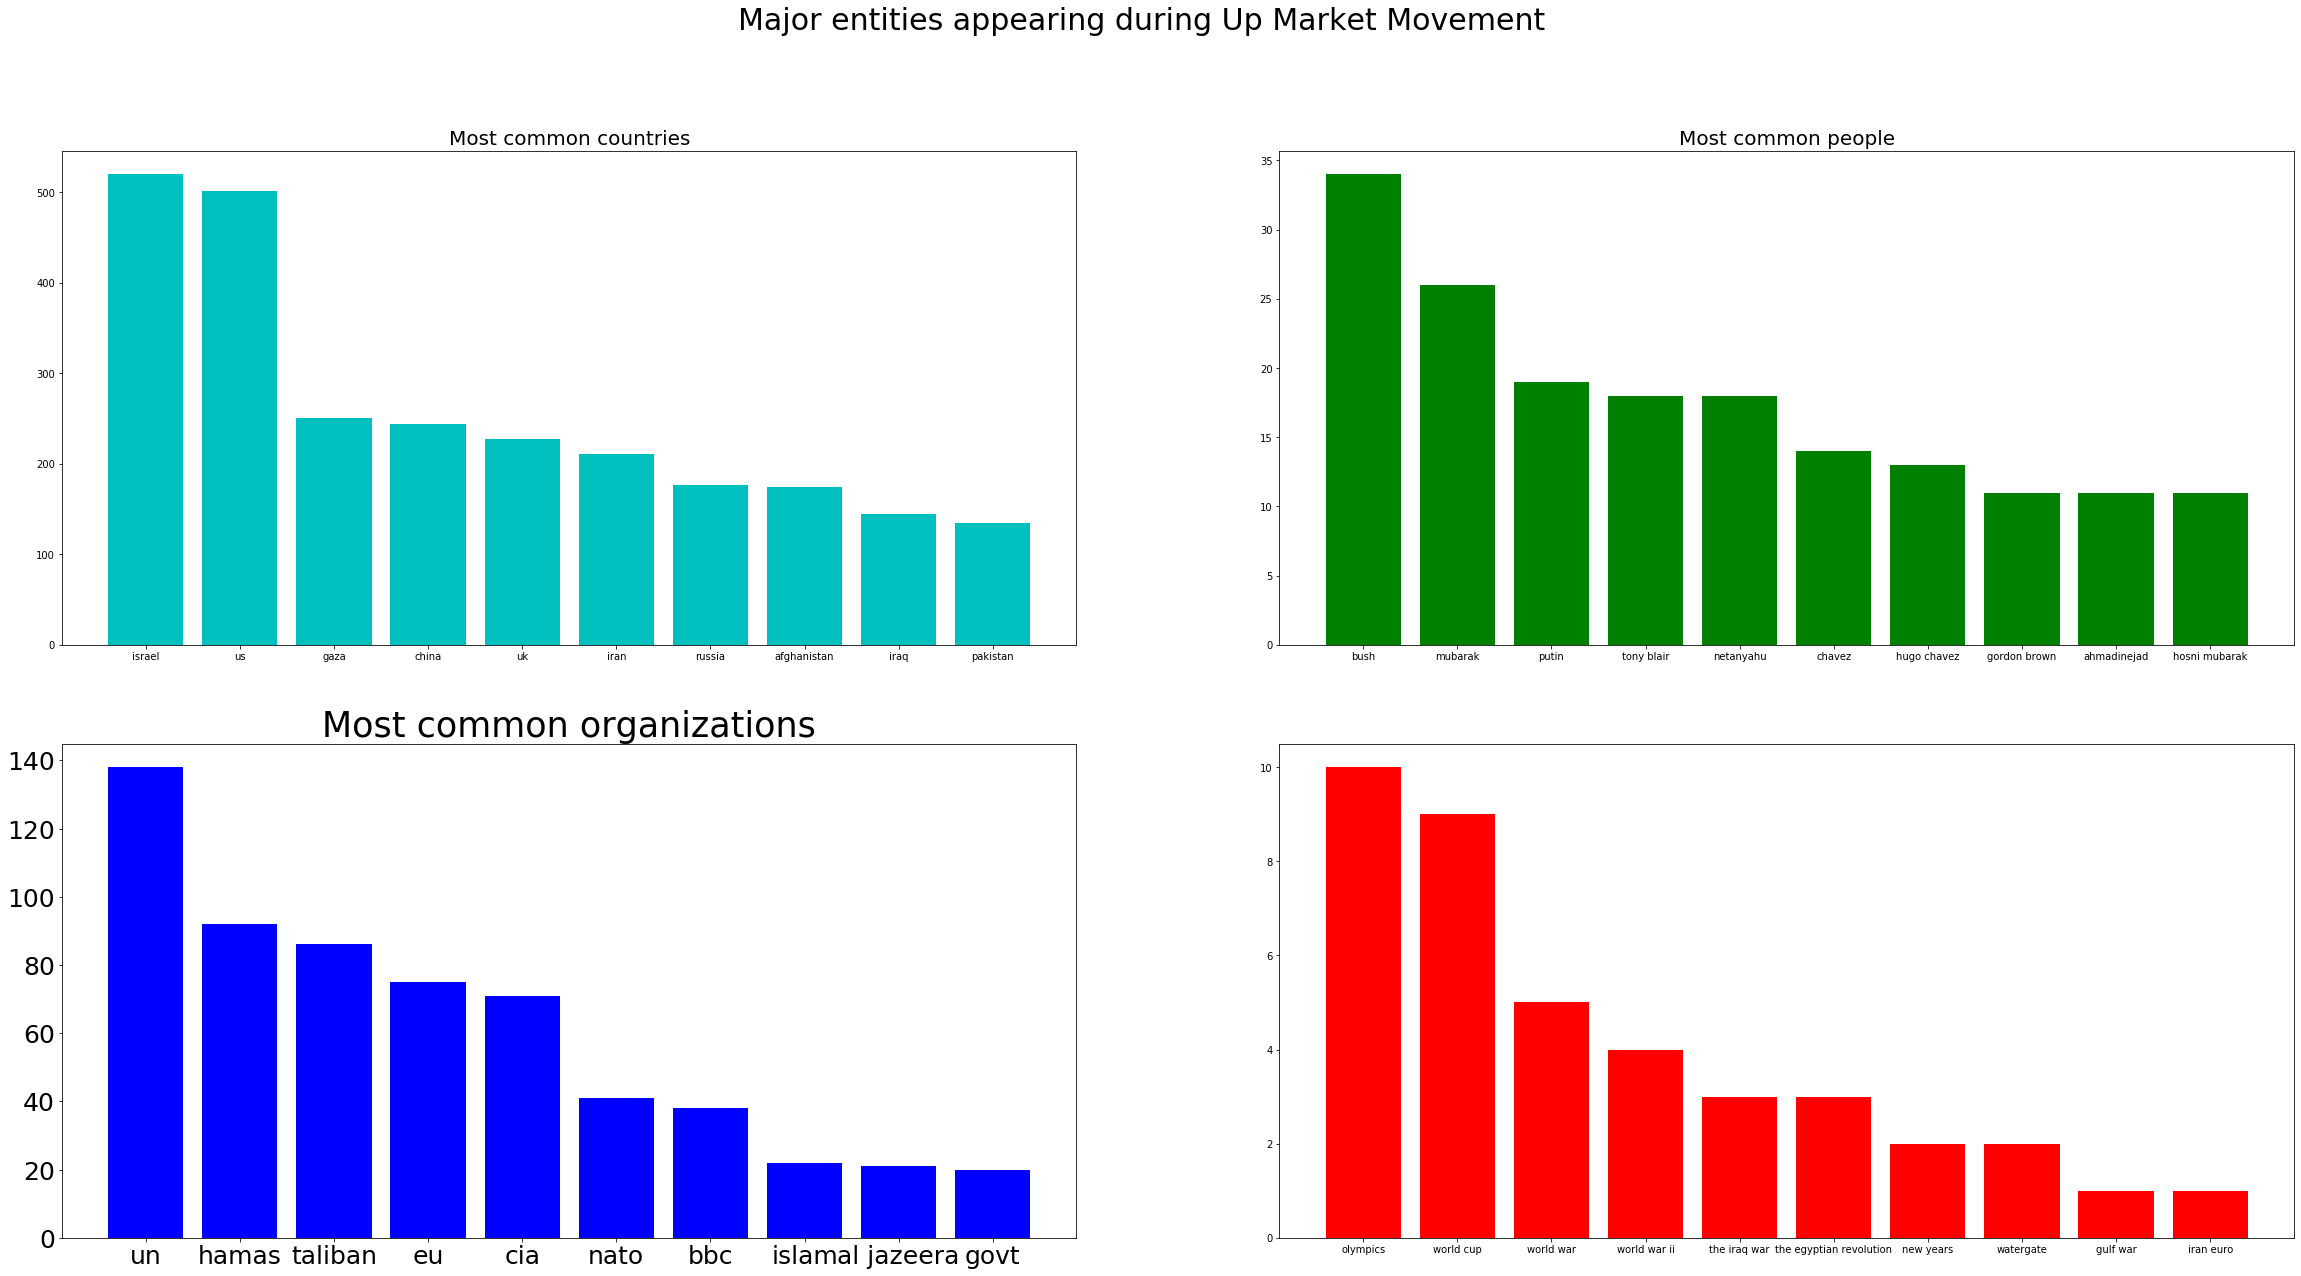

In [81]:
# Four axes, returned as a 2-d array
plt.figure(figsize=(40,20))
plt.suptitle("Major entities appearing during Up Market Movement", fontsize = 30)

plt.subplot(2,2,1)
plt.bar(word_c_up, frequency_c_up,color = "c")
plt.title('Most common countries', fontsize = 20)

plt.subplot(2,2,2)
plt.bar(word_p_up,frequency_p_up,color = "g")
plt.title('Most common people', fontsize = 20)

plt.subplot(2,2,3)
plt.bar(word_o_up,frequency_o_up,color = "b")
plt.title('Most common organizations', fontsize = 35)
plt.tick_params(axis = 'both', labelsize = 25)
plt.subplot(2,2,4)
plt.bar(word_e_up,frequency_e_up,color = "r")
plt.title('Most common events', fontsize = 20,color='w')

# NER for down market

In [67]:
N = 1000000
doc_down = nlp(downs_corpus_str[1:N])

In [68]:
for i in doc_down.ents:
    print(i.label_, i.text)

PERSON eorgia downs
CARDINAL two
NORP russian
GPE russia
DATE today
NORP russian
NORP georgian
NORP afghan
ORG un
DATE three year old
CARDINAL 150
NORP russian
GPE georgia
CARDINAL two
NORP russian
GPE georgia
GPE south ossetia
GPE russia
ORG sos
PERSON salim haman
DATE 5 12 years
NORP georgian
CARDINAL several hundred
GPE us
GPE georgia
GPE russia
GPE israel
GPE iran
GPE us
NORP israeli
NORP american
ORG fbi
GPE sorussia
GPE georgia
EVENT olympics
GPE china
PERSON bush
EVENT world war iii
DATE today
GPE georgia
GPE russia
ORG nato
GPE georgia
NORP islamist
PERSON backlash condoleezza rice
GPE us
NORP israeli
GPE iran
NORP israeli
PERSON ehud barak
GPE israel
DATE a busy day
ORG the european union
GPE iran
GPE georgia
CARDINAL 1000
GPE iraq
NORP russian
ORG pentagon
GPE iran
GPE us
GPE georgia
NORP indian
EVENT olympics
PERSON mexicos
CARDINAL 9yearold
GPE russia
GPE georgia
GPE iraq
GPE georgia
LOC west
ORG microsoft
ORG intel
EVENT the russogeorgian war
EVENT georgiarussia war vote
G

LOC south america
DATE monday
GPE us
NORP british
GPE us
GPE yemen
NORP israeli
NORP russian
PERSON dmitry medvedev
CARDINAL a third
TIME night
NORP chinese
GPE uk
TIME 50bn 88bn
GPE iowa
ORG nebraska
GPE us
CARDINAL 30
NORP afghan
GPE us
NORP afghan
GPE russia
QUANTITY 1 mln
DATE 2012
CARDINAL 9
NORP russian
GPE uk
PERSON salvador vergara
NORP mexican
GPE mexico
NORP afghan
PERSON junkie
GPE lebanon
GPE israel
NORP lebanese
GPE israel
LOC middle eastern
PERSON hummus uk
MONEY 500 billion english
GPE china
ORG taliban
NORP hindu
GPE indian province
NORP christians
GPE china
ORG cnn
NORP new german
PERSON bush
DATE this month
LOC africa
DATE 14 year old
NORP british
DATE 16 year old
GPE mexico
CARDINAL 4
CARDINAL 6
CARDINAL 3
CARDINAL 77
GPE uk
CARDINAL 77
NORP russian
PERSON dmitry medvedev
NORP european
GPE us
GPE us
GPE palestine
PERSON rothschild
LOC the middle east
NORP jews
NORP jews
GPE israel
NORP palestinians
NORP jewish
GPE china
CARDINAL 90000
GPE germany
FAC guantanamo
CARDI

FAC the vancouver airport
DATE last year
GPE moscow
ORG gm
GPE china
CARDINAL thousands
GPE zimbabwe
NORP greek
GPE berlin
ORG aafia
CARDINAL only half
PERSON arundhati roy mumbai
CARDINAL 911
NORP greek
NORP russian
GPE moscow
ORG shell
DATE one quarter
GPE jordan
CARDINAL at least 47
CARDINAL 93
NORP iraqi
TIME hours
NORP armenian
NORP greek
NORP iraqi
PERSON george bush
NORP turkish
ORG armenian genocide greece protester
CARDINAL two
PERSON bush
NORP alzaidis
NORP iraqi
GPE iran
NORP arabs
ORG dikshit
GPE us
CARDINAL 300 million
GPE uk
NORP muslims
NORP iraqi
LOC guantanamo
GPE america
NORP iraqi
GPE congo
GPE rwanda
ORG amazon
PERSON greenpeace
GPE paris
NORP islamic
ORG un
GPE afghanistan
GPE mexico
PERSON bush
NORP american
PERSON law
ORG un
NORP iraqi
GPE iraq
GPE iraq
GPE china
GPE somalia
PERSON jacob zuma
NORP south african
PERSON muntadhar alzeidi
DATE the year
NORP nigerian
CARDINAL dozens
DATE 15 years
GPE south korea
PERSON castro
GPE us
NORP russian
GPE cuba
NORP south k

NORP palestinian
ORG hamas
GPE the united states
NORP afghan
PERSON hamid karzai
NORP afghanistans
GPE russia
PERSON chavez
GPE the united states
GPE israel
NORP palestinian
GPE gaza
GPE west bank
PERSON netanyahu
ORG hamas
GPE gaza
GPE russia
CARDINAL millions
GPE the hague
GPE israel
GPE the gaza strip
GPE india
GPE us
GPE india
GPE china
GPE brazil
GPE gaza
GPE jerusalem
NORP israeli
GPE iraq
GPE afghanistan
GPE fraudindia
CARDINAL more than 80
GPE israel
GPE us
GPE israel
ORG gaza journal
NORP jews
NORP palestinians
GPE us
ORG hamas
ORG un
GPE israel
GPE gaza
ORDINAL third
GPE north korea
CARDINAL 1300
NORP palestinians
ORG hamas
GPE israel
GPE the gaza war
NORP israeli
GPE india
GPE china
FAC somalia international criminal court
GPE gaza
CARDINAL 1
GPE mexicowow ireland
DATE 2004
GPE us
QUANTITY over 500 million gallons
MONEY about 11 billion
NORP israeli
ORG militarys
GPE gaza strip
GPE vatican
GPE israel
CARDINAL 43 million
ORG gaza europe police cooperation
GPE israel
GPE austr

ORDINAL second
GPE france
NORP european
GPE turkey
DATE 10 years
CARDINAL 42 million
DATE 2007
CARDINAL more than a million
LOC africa
ORDINAL first
CARDINAL hundreds
ORG uk hospital
GPE us
NORP israeli
ORG pentagon
NORP iranian
GPE iowa
ORG turkey farm pay mentally
MONEY 37 cents
NORP palestinians
PERSON george galloway
GPE canada
PERSON aig
ORG un
NORP israeli
GPE gaza
GPE russia
PERSON vladimir putin
DATE 1417
GPE gaza
GPE israel
GPE somalia
DATE just six months
DATE the past two decades
DATE 1bn a year
GPE israel
GPE gaza
NORP japanese
GPE iran
PERSON nicholas kristof
GPE washington
LANGUAGE english
NORP dutch
NORP russian
ORG us navy
ORG fbi
GPE us
NORP muslim
CARDINAL thousands
NORP iraqis
NORP israeli
CARDINAL two
CARDINAL one
ORG sri lankas ministry of defense
GPE north korea
NORP american
NORP israeli
PERSON military rabbis
GPE gaza
NORP jews
GPE israel
DATE a thousand years ago
GPE israel
LOC earth
GPE india
CARDINAL 70
CARDINAL 25
QUANTITY billions of pounds
ORG royal bank o

GPE taiwan
NORP russian
GPE north korea
PERSON mickey mouse
CARDINAL 62
NORP americans
CARDINAL 401ks
NORP asians
PERSON aung san suu kyi
CARDINAL millions
NORP greek
GPE us
PERSON suu kyi
CARDINAL thousands
NORP catholic
NORP chinese
PERSON robert dziekanski
DATE 2007
NORP european
GPE poland
PERCENT some 98 percent
DATE 7500
NORP jews
EVENT world war ii
PERCENT only nine percent
NORP dutch
NORP jews
ORG farright czech party
GPE afghanistan
GPE us
GPE russia
NORP brazilian
NORP dutch
GPE uk
DATE months
PERSON bush
NORP tasmanian
DATE as little as 20 years
CARDINAL millions
GPE afghanistan
PERSON venezuelas chavez
NORP trossel german
NORP european
NORP british
GPE spain
CARDINAL 3
GPE us
NORP spanish
NORP canadian
PERSON allison crowe
GPE england
NORP muslim
PERSON al qaedas
GPE us
LOC north koreas
GPE serbia
GPE sri lanka
NORP british
NORP sinhalese
CARDINAL two
GPE pakistan
GPE libya
NORP libyan
GPE n korea
DATE 1953
NORP australian
CARDINAL less than 32
PERSON deng yujiao
NORP chine

NORP afghan
GPE tehran
GPE afghanistan
PERSON umberto eco
NORP italians
ORG roya
GPE iran
CARDINAL 792009
NORP turkish
GPE xinjiang
GPE iran
CARDINAL hundreds
NORP south korean
ORDINAL third
GPE china
PERSON urumqi mosque
NORP christian
PERSON mosque loudspeakers
ORG taliban
PERSON skorea
CARDINAL 16
GPE britain
PERSON gordon brown
GPE china
CARDINAL 10000
GPE afghanistan
GPE the united states
GPE honduras
NORP wordsisraeli
NORP israelipalestinian
NORP palestinians
CARDINAL 27b
ORG natalia estemirova
GPE chechnya
TIME tuesday morning
GPE israel
DATE 1948
NORP arabic
LOC asia
GPE saudi arabia
CARDINAL more than 3000
NORP israeli
NORP arabs
GPE west rnjerusalem
GPE us
NORP jewish
GPE east jerusalem
GPE saudi arabia
GPE france
NORP israeli
GPE paris
NORP jewish
GPE east jerusalem
GPE israel
GPE the west bank
NORP palestinians
DATE the century
GPE iran
GPE israel
PERSON ahmadinejad
TIME three hours
GPE brazil
NORP israeli
PERSON benjamin netanyahu
CARDINAL five
NORP palestinians
CARDINAL f

LOC hatched sea
GPE miami beach
ORG taliban
GPE afghanistan
GPE the republic of china
GPE taiwan
GPE colombia
DATE three days
DATE june
QUANTITY about 60 miles
NORP scottish
ORG justice
PERSON kenny macaskill
GPE lockerbie
DATE september 15th
PERSON kevin elliot
GPE afghanistan
CARDINAL 9
GPE south africa
DATE live 15 years
GPE australia
MONEY 90 per cent
DATE between 1981 and 2006
NORP iraqi
GPE israel
DATE wednesday
ORG un
GPE the gaza strip
GPE uk
NORP australian
DATE daily
DATE 30 years
CARDINAL four
GPE homophobia
NORP muslim
GPE yemen
CARDINAL 80
GPE london
NORP mexican
PERSON ciudad juarez
CARDINAL 10
ORDINAL second
DATE this month 4 15
DATE 35
CARDINAL 42
GPE bulgaria
GPE china
GPE venezuela
GPE us
GPE poland
GPE the czech republic
CARDINAL 17
GPE russia
ORDINAL first
DATE 21 years
DATE the 18 years
GPE afghanistan
DATE 30 years
CARDINAL 4
PERSON netanyahu
PERSON obamas
NORP israeli
GPE us
NORP christian
DATE tuesday
ORG eastern pakistan human rights groups
DATE 27 years
PRODUC

NORP arabs
GPE the democratic republic of congo
GPE uk
NORP british
GPE uk
PERSON robert dziekanski
FAC the vancouver airport
NORP polish
DATE tuesday
CARDINAL more than 500
GPE uk
CARDINAL thousands
CARDINAL 9000
NORP afghanistans
DATE 30 years
GPE afghanistan
NORP italian
ORG mafia
GPE detroit
ORG radical islam group
ORG fbi
ORG state
PERSON hillary clinton
DATE thursday
GPE pakistan
CARDINAL billions
GPE us
ORG al qaeda
PERSON nyt ahmed wali karzai
NORP afghan
NORP countrys
ORG cia
CARDINAL two
GPE canada
GPE canada
LOC rwandan war criminal
DATE 1994
ORG the european union
GPE turkey
LOC the middle east
CARDINAL 5 billion
DATE the past two years
ORG un
GPE zimbabwe
CARDINAL more than 60
NORP iraqi
GPE baghdad
ORG koreas influential economic
DATE each year
ORDINAL second
GPE timor sea
CARDINAL 112
CARDINAL 17
CARDINAL 18
CARDINAL five
ORG the colombian army
GPE japan
GPE kenya
CARDINAL two
GPE canada
GPE malta
NORP russians
NORP british
PERSON david nutt
PERSON gordon brown
GPE uk
PE

DATE the century
NORP chinese
NORP chinese
GPE toronto
CARDINAL 73
NORP haitian
GPE china
NORP chinese
DATE another day
GPE mexico
DATE 20 years
LOC gilligans island
GPE haiti
CARDINAL 70
TIME this morning
PERSON jay leno
TIME late night
DATE almost seven years later
EVENT the iraq war
NORP irans
PERSON agatha christie
PERSON rodrigo rosenberg
NORP nazi
PERSON adolf hitlers
GPE berlin
GPE haiti
NORP british muslim
NORP islamists
GPE haiti
GPE uk
GPE iraq
NORP chinese
GPE china
GPE japan
DATE half a century
LOC africa
PERSON jane goodall
DATE 22 years
PERSON el teo
GPE mexico
GPE new york
GPE south africa
ORG ibm
ORG fujitsu
ORG fbi australia
GPE australia
NORP christian
ORG bnp
NORP british
NORP israelis
GPE gaza
GPE china
PERSON mirko fischer
NORP british
GPE iran
DATE 6 years ago
CARDINAL 21 billion
GPE france
ORG haitis bicentennial blues canada
GPE haiti
NORP chinese
PERSON gao zhisheng
ORG the beijing public security bureau
CARDINAL 200000
GPE iraq
NORP jewish
FAC mosque
PERSON al

ORG rnthan one
GPE north korea
DATE 2008
NORP korean
CARDINAL 700 thousand
GPE pakistan
NORP hindu
PERSON russias
CARDINAL thousands
PERSON putin
NORP koreans
PERSON benedict xvi
NORP american
CARDINAL hundreds
NORP american
NORP north koreans
GPE china
PERSON kim
GPE vatican
DATE thursday
NORP catholic
GPE usrussia
GPE nukes
CARDINAL 1500
GPE nukes
NORP afghan
GPE israel
NORP british
GPE uk
CARDINAL 911
GPE america
DATE today
ORG un human rights council
GPE israel
NORP palestinians
DATE last years war
GPE gaza strip
NORP russian
NORP british
GPE rome
ORG countrys
ORG bbc
NORP israelis
GPE east jerusalem
GPE iceland
GPE israel
ORG mossad
GPE australia
GPE france germany
GPE ireland
NORP israeli
GPE boobytraps
PERSON bush
GPE yemen
ORG cia
ORG state department
ORG icelandic surveillance
GPE uk
PERSON gordon brown
NORP britains
GPE turkey
NORP turkish
PERSON recep tayyip erdogan
GPE germany
NORP turkish
CARDINAL 60 million
GPE china
NORP islamic
GPE nigeria
ORG sharia lawfox news
NORP so

GPE south africa
DATE 1975
DATE just weeks
PERSON kim jong il
DATE 8 year old
NORP australian
NORP irish
GPE japan
CARDINAL dozens
ORG countrys
GPE southnorth korea
GPE south korea
ORG catholic church
CARDINAL 100
CARDINAL 10
GPE italy
PERSON rothschild
PERSON rothschilds
NORP russian
CARDINAL 9
NORP russian
NORP turkish
NORP israelis
CARDINAL 75 million
NORP canadian
GPE west bank
CARDINAL two
NORP democratic
DATE decades
GPE us
ORG iran palestinian authority
PERSON mahmoud abbas
GPE iran
DATE wednesday
NORP iranians
NORP palestinians
GPE nahlin
CARDINAL dozens
CARDINAL 500
DATE some hundreds of years old
NORP korean
NORP korean
NORP german
PERSON laura ling
PERSON lee
GPE north korea
ORG national museum flood of frogs
NORP greek
PERSON nicolas sarkozy
NORP french
NORP yemeni
ORG al qaeda
DATE today
NORP muslim
PERSON mr stoltenberg
NORP south korean
NORP japanese
PERSON peter bethune
GPE gaza
ORG the israeli navy
QUANTITY 10000 tons
NORP rnhumanitarian
CARDINAL hundreds
NORP israeli


WORK_OF_ART mi5
ORG goldman deutsche bank
ORG merrill lynch
CARDINAL 2
GPE pakistan
CARDINAL two
CARDINAL three
NORP british
CARDINAL at least 41
CARDINAL hundreds
NORP pakistani
EVENT lahore hina
CARDINAL six
CARDINAL ten
GPE shenzhen
GPE germany
GPE china
NORP german
NORP chinese
GPE germany
CARDINAL one
NORP german
DATE 1968
GPE pedophilia
ORG ifa
PERSON goodluck jonathan
DATE two years
GPE nigeria
PERSON goodluck jonathan
GPE rhodesia
GPE zambia
GPE afghanistan
GPE akistan
GPE mosque
ORG cctv first
GPE lahore
CARDINAL 42
CARDINAL one million
GPE iraq
GPE egypt
PERSON amas
GPE ussia
PERSON banrgentina senate
ORDINAL first
LOC latin america
GPE sudan
NORP sudanese
NORP atican
PERSON pedophelia
NORP british
PERSON libyan pan am flight 103
MONEY a billion dollar
PERSON libya ou
DATE those days
PERSON chavez
GPE ndia
CARDINAL 3000
DATE 2008
CARDINAL 166
ORG isi
NORP israelis
MONEY billions of pounds
GPE afghanistan
QUANTITY billions of pounds
GPE afghanistan
ORG militarys
NORP afghanist

DATE 100 years
GPE seoul
GPE korea
GPE north korea
GPE north korea
CARDINAL 4
GPE orea
GPE japan
NORP ndonesian
GPE authoritywo
DATE 3000 years
GPE laos
GPE united states
DATE 30 years ago
CARDINAL more than 20000
NORP jews
GPE america
GPE the united states
GPE washington
GPE israel
NORP american
ORG the defense department
DATE ustralian election 17 days
PRODUCT poll 2
CARDINAL 3
ORG parliament
PERSON julia gillard
GPE france
ORG ritains parliament
PERSON murdoch
PERSON pm
NORP ritish
DATE 6 months
GPE america
GPE islamophobia
ORG quran
GPE us
CARDINAL millions
GPE uk
GPE japan
NORP reepy
CARDINAL 12 billion
GPE india
CARDINAL 12 billion
GPE hinas
DATE 1930s
PERSON huang jing
ORG the school of public policy
GPE japan
DATE 1930s
NORP exican
GPE guatemala
NORP iranian
ORG irans foreign ministry
NORP exican
CARDINAL 72
GPE kabul
PERSON mosque menace
GPE manhattan
NORP european
NORP muslims
PERSON rench
NORP american
NORP dutch
CARDINAL four
GPE netherlands
NORP palestinians
CARDINAL 148
C

GPE turkey
NORP muslim
DATE decades
ORG akp
CARDINAL 911
NORP muslim
NORP muslim
GPE us
CARDINAL 16
GPE us
GPE china
GPE china
ORG wto
ORG k london
ORG norway denmark
GPE sweden
GPE iceland
GPE us
CARDINAL 1
NORP british
CARDINAL more than 70
GPE brazil
CARDINAL fewer than 3500
CARDINAL three
NORP caspian
DATE the 20th century
LOC south china
DATE more than 25 years
ORG senate
GPE greece
GPE ustralia
GPE china
CARDINAL 15
TIME 18 minutes
CARDINAL at least 10
GPE egypt
NORP christian
NORP muslim
PERSON darfur zimbabwe burma
GPE north korea
NORP chinese
CARDINAL three
NORP christians
GPE us
LOC west
NORP american
NORP muslims
NORP christians
PERSON m jongun
GPE north korea
CARDINAL thousands
GPE sudan
CARDINAL half
GPE uk
GPE lebanon
ORG treasury
PERSON mosquito
NORP yemeni
ORG coast guard
PERSON jerome kerviel
DATE five years
MONEY almost 5 billion euros
PERSON ladimir putin
ORG world bank
DATE 2022
GPE russia
DATE today
GPE us
ORG the school of assassins
GPE georgia
CARDINAL 9
GPE new 

GPE razil
CARDINAL at least two
DATE last october
CARDINAL one
CARDINAL one
DATE decades
GPE brazil
GPE sri lanka
CARDINAL 120000
CARDINAL hundreds
GPE us
DATE thursday
PERSON silvio berlusconi
ORG al jazeera
NORP israeli
NORP pakistans
TIME honours
NORP slur
NORP canadian
NORP exican
DATE 34612
CARDINAL 4
ORG unisia
DATE under 18
CARDINAL 96
ORG bolivian farmers
MONEY 60 per cent
GPE south sudan
GPE robert mugabes zimbabwe
GPE hina
GPE china
PERSON gates
CARDINAL 73
DATE 2011 january 13 161641
NORP tunisian
DATE nearly a month ago
ORG rhine n
NORP israeli
CARDINAL 60000
PERCENT 35 percent
GPE east jerusalem
NORP palestinians
NORP israeli
PERCENT 40 percent
GPE east jerusalem
NORP palestinians
GPE israel
NORP palestinian
PERSON srael kidnaps
CARDINAL eight
NORP palestinians
GPE the west bank
ORG nesco
GPE venezuela
CARDINAL thousand
NORP israelis
GPE tel aviv
NORP israeli
NORP palestinian
DATE two decades
DATE 2002
NORP dutch
GPE cuba
DATE next month
NORP catholic
GPE mexico
NORP ussia

CARDINAL 200
PERSON avid cameron
GPE britain
GPE italy
NORP palestinians
GPE west bank
NORP israeli
CARDINAL some 200
CARDINAL five
NORP israelis
DATE last month
NORP ortuguese
PERSON jose socrates
DATE months
ORG eu
DATE wednesday
QUANTITY as much as 80 billion euros
NORP palestinian
PERSON james foley
CARDINAL 3
NORP libyan
PERSON muammar gaddafi
GPE china
GPE russia
NORP israeli
PERSON au mau
CARDINAL four
NORP kenyans
ORG mau mau
ORG the uk governmenta human
DATE about 2684 years ago
GPE uk
LOC europe
CARDINAL one
GPE ussia
LOC the moon
GPE russia
LOC the moon
DATE 20 years
LOC mars n
CARDINAL more than 100
GPE the ivory coast
NORP hinese
GPE libya city
FAC tahrir square
NORP israeli
GPE egypt
GPE israel
ORG iceland erman
PERSON fukushima
NORP ussian
PERSON voina
ORG penis
GPE st petersburg
ORG ministry of culture ussias fsb
PERSON skype gmail
PERSON hotmail kremlin
ORG richpoor
GPE us
ORG un
ORG royal navy
ORG hms
TIME earlier today
GPE ivory coast
GPE anada
ORG gm
ORG gm
ORG hama

DATE earlier this week
NORP british
DATE 1900
CARDINAL three
NORP uropean
ORDINAL third
ORDINAL first
DATE 1650
NORP ukrainian
PERSON razil
CARDINAL lift millions
DATE 2014
PERSON dilma rousseff
GPE south africa
ORG wto
NORP shiite
NORP sunni
CARDINAL 1
ORG n argentine court
ORG the countrys main media group
DATE 1970s
PERSON saleh
GPE chile
MONEY tens of thousands of dollars
NORP christian
GPE hina
ORG exmossad
GPE ussia
NORP european
GPE hina
GPE us
NORP yrian
CARDINAL 27
GPE hama crackdown
GPE yemen
PERSON ali abdullah saleh
NORP arab
NORP arab
ORG ratko mladic
LOC the middle east
CARDINAL 50
CARDINAL 17
CARDINAL 2022 eight
GPE india
DATE 24 years old
NORP russian
NORP ustralian
PRODUCT s missile
CARDINAL 16
GPE pakistan
NORP syrian
DATE a month
NORP arab
PERSON moroccos arab
CARDINAL 22
CARDINAL more than 2000
LOC europe
TIME last night
GPE greece
ORG eu
MONEY over 100 billion euros
CARDINAL 60 billion
GPE kuwait
GPE peru
LOC americas
ORG al jazeera
EVENT english 8
CARDINAL 10
NORP

GPE ireland
NORP vaticans
NORP followeruardian
PERSON murdoch
LOC murdoch
CARDINAL 7 billion
DATE 2011
GPE us
LOC arctic
NORP anadians
NORP east african
GPE addafi
GPE libya
GPE korea
GPE apan
GPE us
GPE hinas
GPE us
NORP muslims
ORG unisian court
PERSON ben ali
DATE 16 years
GPE russia
NORP polish
GPE russia
DATE last year
ORG lech
NORP norwegian
ORG mcdonalds
ORG kfc
NORP alestinians
GPE california
NORP american
CARDINAL ens of thousands
NORP egyptian
NORP islamists
GPE greece
GPE spain
GPE germany
NORP germans
PERSON osni mubarak
CARDINAL 115 billion
CARDINAL 25000
ORG news corp
GPE uk
ORG attackdog
PERSON bin laden
NORP hinese
ORG unrest u fishing fleets discarded
NORP japanese
NORP hinese
GPE north korea
DATE an early date
GPE norway
NORP palestinian
CARDINAL 2 trillion
GPE us
GPE china
ORG treasury
ORG hsbc
CARDINAL 25000
DATE 2013
CARDINAL 20
PERSON jens stoltenberg
PERSON hunt
PERSON jens stoltenberg
DATE 22 july
DATE weekend
GPE xinjiang
GPE pakistan
NORP west yrian
ORG nytime

NORP hark
NORP colombian
CARDINAL up to 2000
ORG anada supreme court
NORP longterm
GPE egypt
GPE bahrain
NORP arab
ORG amnesty international
GPE south africa
PERSON alai lamas
NORP tibetans
GPE china
DATE decades
CARDINAL hundreds of thousands
GPE athens
DATE the first day
PERSON strike hvez
ORG venezuelas supreme court
PERSON leopoldo lpez
EVENT hugo
DATE next years
GPE turkey
GPE iraq
ORG hina hails
GPE iraq
NORP kurdish
CARDINAL at least 26
NORP turkish
CARDINAL t least 21
NORP turkish
NORP kurdish
LOC southeast turkey
LOC europe
GPE iran
NORP ussian
PERSON vladimir putin
DATE wednesday
NORP communist
PERSON omali kidnappers
NORP french
LOC the arctic sea
ORG apan
QUANTITY 2419 square kilometres
LOC landan area
GPE tokyo
NORP prosomali
CARDINAL 75
CARDINAL 24
NORP turkish
PERSON jane fonda
DATE 40 years
NORP alestinian
ORG visa mastercard paypal
ORG city council
NORP libyans
NORP western
PERSON icolas sarkozy
PERSON david cameron
GPE vietnam
ORG poacher group
ORG moderate islamist p

DATE the next quarter
ORG the international monetary fund
ORG the european central bank
NORP chinese
GPE guangdong province
NORP belgian
GPE anada
ORDINAL first
GPE russia
CARDINAL hundreds
QUANTITY some over a kilometer
NORP iranian
NORP italian
CARDINAL two
LOC central florence
CARDINAL two
NORP senegalese
CARDINAL three
CARDINAL 10
ORG cia
NORP lebanese
GPE yria crackdown
CARDINAL 5000
ORG un
ORG unisias assembly
GPE washington
CARDINAL 008
PERSON james murdoch
ORDINAL first
NORP hinese
CARDINAL over 100
DATE today
DATE years
GPE marijuana
ORG marijuana
CARDINAL 100
PERSON vladimir putin
GPE new jersey
PERSON mikhail prokhorov
PERSON vladimir putin
NORP russian
DATE march
GPE saudi arabia
CARDINAL 9000
GPE anada
PERSON peter kent kyoto
GPE israel
NORP iranian
GPE tehran
GPE romania
ORG eu
GPE ndia
GPE china
GPE china
ORDINAL first
LOC indian ocean
GPE ussia
GPE syria
GPE syria
FAC belgium atellite navigation
ORDINAL first
ORG the chinese communist party
CARDINAL 20000
NORP chinese
G

In [69]:
dict_down = {}

for i in doc_down.ents:
    if i.label_ not in dict_down.keys():
        dict_down[i.label_] = 1
    else:
        dict_down[i.label_] = dict_down[i.label_] + 1



The counts of entities recognized are given below

In [70]:
dict_down

{'PERSON': 1652,
 'CARDINAL': 2243,
 'NORP': 3927,
 'GPE': 5851,
 'DATE': 1515,
 'ORG': 2102,
 'EVENT': 117,
 'LOC': 393,
 'FAC': 116,
 'ORDINAL': 265,
 'PRODUCT': 37,
 'LAW': 21,
 'TIME': 145,
 'MONEY': 78,
 'QUANTITY': 139,
 'PERCENT': 35,
 'LANGUAGE': 22,
 'WORK_OF_ART': 26}

In [71]:
dict_1_down = {}

for i in doc_down.ents:
    if i.label_ not in dict_1_down.keys():
        dict_1_down[i.label_] = []
        dict_1_down[i.label_].append(i.text)
    else:
        dict_1_down[i.label_].append(i.text)

In [72]:

dict_2_down_c = {}
dict_2_down_o = {}
dict_2_down_p = {}
dict_2_down_e = {}

# Top countries 

for k,v in dict_1_down.items():
    if k in ['GPE']:
        for i in range(len(v)):
            if v[i]  not in dict_2_down_c.keys():
                dict_2_down_c[v[i]] = 1
            else:
                dict_2_down_c[v[i]] = dict_2_down_c[v[i]] + 1

# Top organizations

for k,v in dict_1_down.items():
    if k in ['ORG']:
        for i in range(len(v)):
            if v[i]  not in dict_2_down_o.keys():
                dict_2_down_o[v[i]] = 1
            else:
                dict_2_down_o[v[i]] = dict_2_down_o[v[i]] + 1

#Top people

for k,v in dict_1_down.items():
    if k in ['PERSON']:
        for i in range(len(v)):
            if v[i]  not in dict_2_down_p.keys():
                dict_2_down_p[v[i]] = 1
            else:
                dict_2_down_p[v[i]] = dict_2_down_p[v[i]] + 1
                
# Top events

#Top people

for k,v in dict_1_down.items():
    if k in ['EVENT']:
        for i in range(len(v)):
            if v[i]  not in dict_2_down_e.keys():
                dict_2_down_e[v[i]] = 1
            else:
                dict_2_down_e[v[i]] = dict_2_down_e[v[i]] + 1

                
print("\nTop Countries \n\n",sorted(dict_2_down_c.items(), key=operator.itemgetter(1), reverse = True)[:10],"\n")

print("\nTop Organizations \n\n",sorted(dict_2_down_o.items(), key=operator.itemgetter(1), reverse = True)[:10],"\n")

print("\nTop People \n\n",sorted(dict_2_down_p.items(), key=operator.itemgetter(1), reverse = True)[:10],"\n")

print("\nTop Events \n\n",sorted(dict_2_down_e.items(), key=operator.itemgetter(1), reverse = True)[:10],"\n")



Top Countries 

 [('us', 472), ('israel', 458), ('iran', 276), ('gaza', 250), ('china', 241), ('uk', 213), ('afghanistan', 153), ('pakistan', 147), ('russia', 134), ('iraq', 129)] 


Top Organizations 

 [('un', 154), ('taliban', 83), ('hamas', 62), ('eu', 62), ('cia', 50), ('nato', 46), ('bbc', 44), ('al qaeda', 20), ('fbi', 16), ('the european union', 14)] 


Top People 

 [('bush', 36), ('bin laden', 23), ('tony blair', 22), ('ahmadinejad', 19), ('putin', 16), ('chavez', 16), ('osama bin laden', 16), ('vladimir putin', 14), ('gordon brown', 13), ('nicolas sarkozy', 12)] 


Top Events 

 [('world war ii', 16), ('olympics', 6), ('the iraq war', 5), ('world cup', 5), ('the cold war', 4), ('world war', 4), ('hugo', 3), ('world war iii', 2), ('watergate', 2), ('the gaza war', 2)] 



import operator
sorted_d = sorted(dict_2_down.items(), key=operator.itemgetter(1), reverse = True)
sorted_d

## Plots for Down Market Movement

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

sorted_c_down = sorted(dict_2_down_c.items(), key=operator.itemgetter(1), reverse = True)[:10]
word_c_down = []
frequency_c_down = []

for i in range(len(sorted_c_down)):
  word_c_down.append(sorted_c_down[i][0])
  frequency_c_down.append(sorted_c_down[i][1])

In [74]:

sorted_p_down = sorted(dict_2_down_p.items(), key=operator.itemgetter(1), reverse = True)[:10]
word_p_down = []
frequency_p_down = []

for i in range(len(sorted_c_down)):
  word_p_down.append(sorted_p_down[i][0])
  frequency_p_down.append(sorted_p_down[i][1])


In [75]:

sorted_o_down = sorted(dict_2_down_o.items(), key=operator.itemgetter(1), reverse = True)[:10]
word_o_down = []
frequency_o_down = []

for i in range(len(sorted_c_down)):
  word_o_down.append(sorted_o_down[i][0])
  frequency_o_down.append(sorted_o_down[i][1])


In [76]:

sorted_e_down = sorted(dict_2_down_e.items(), key=operator.itemgetter(1), reverse = True)[:10]
word_e_down = []
frequency_e_down = []

for i in range(len(sorted_c_down)):
  word_e_down.append(sorted_e_down[i][0])
  frequency_e_down.append(sorted_e_down[i][1])


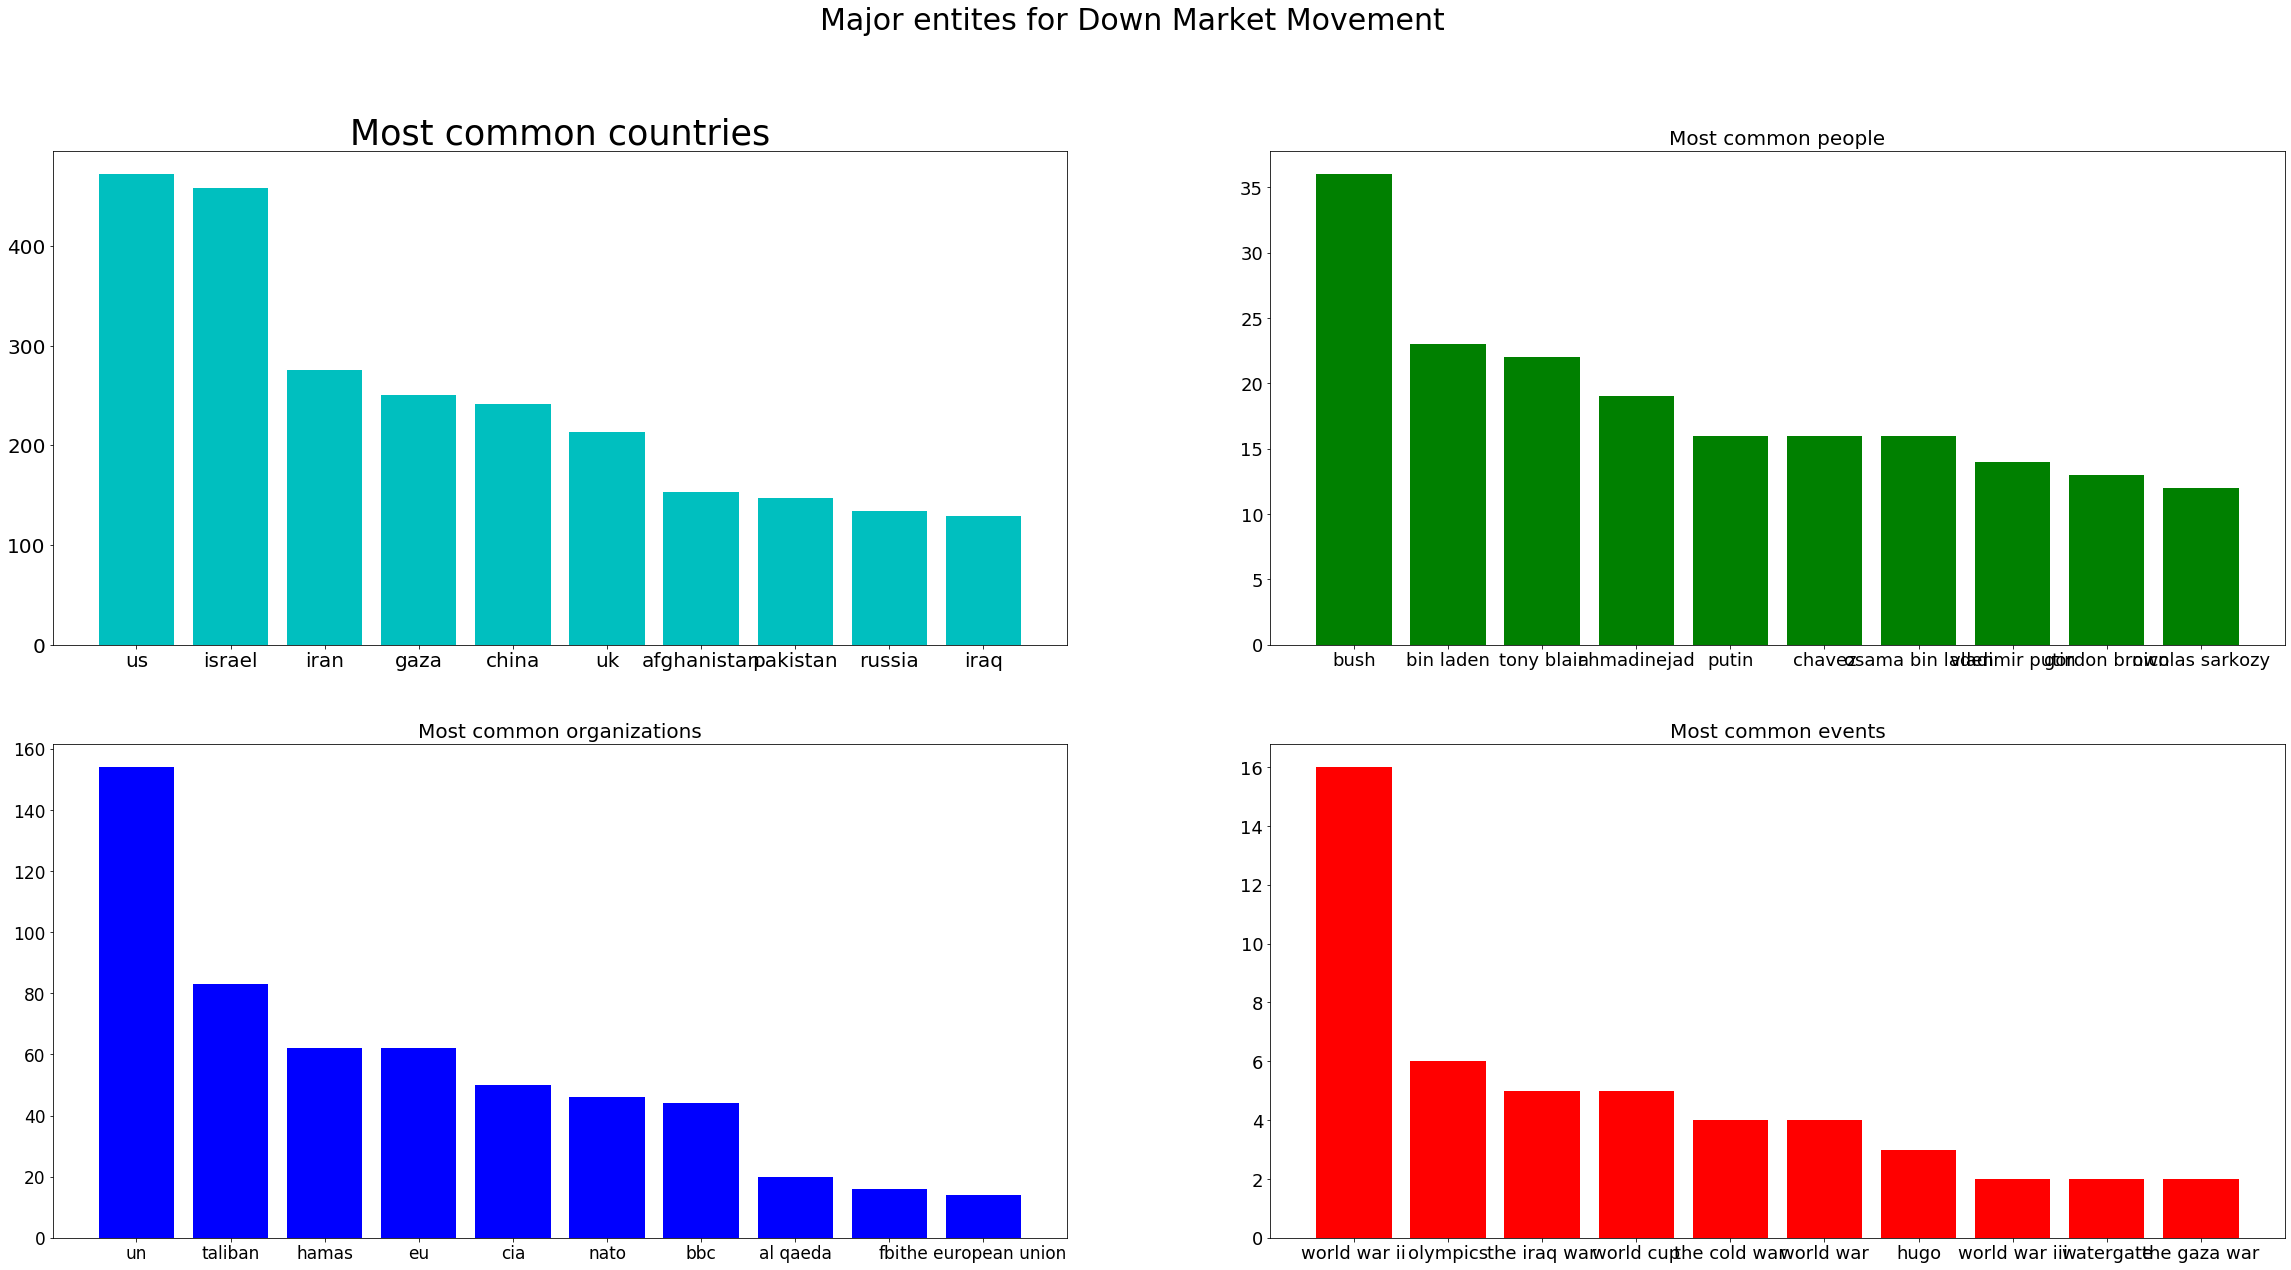

In [86]:
# Four axes, returned as a 2-d array
plt.figure(figsize=(40,20))
plt.suptitle('Major entites for Down Market Movement', fontsize=30)

plt.subplot(2,2,1)
plt.bar(word_c_down, frequency_c_down,color = "c")
plt.title('Most common countries',fontsize = 35)
plt.xticks(fontsize = 10)
plt.tick_params(axis='both',labelsize = 20)

plt.subplot(2,2,2)
plt.bar(word_p_down,frequency_p_down,color = "g")
plt.title('Most common people',fontsize = 20)
plt.tick_params(axis='both',labelsize = 18)

plt.subplot(2,2,3)
plt.bar(word_o_down,frequency_o_down,color = "b")
plt.title('Most common organizations',fontsize = 20)
plt.tick_params(axis='both',labelsize = 17)

plt.subplot(2,2,4)
plt.bar(word_e_down,frequency_e_down,color = "r")
plt.title('Most common events',fontsize = 20)
plt.tick_params(axis='both',labelsize = 18)

# Topic Modelling with Latent Dirichlet Analysis

In [80]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

In [81]:
stemmer = SnowballStemmer('english')
lem = WordNetLemmatizer()

def lemmatize_stemming(text):
    return stemmer.stem(lem.lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [82]:

up_market = data[data['Label']=='1']

up_market_text = up_market['combined']

documents_up= up_market_text

In [83]:
print(len(documents_up))
print(documents_up[:5])

1065
1    why wont america and nato help us if they wont...
4    all the experts admit that we should legalise ...
5    mom of missing gay man too bad hes not a 21yea...
8    two elderly chinese women have been sentenced ...
9    british resident held in guantanamo bay wins l...
Name: combined, dtype: object


In [84]:
doc_sample_up = documents_up[:1].values[0]

#print('original document: ')
words = []
for word in doc_sample_up.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
#print(preprocess(doc_sample_up))

['why', 'wont', 'america', 'and', 'nato', 'help', 'us', 'if', 'they', 'wont', 'help', 'us', 'now', 'why', 'did', 'we', 'help', 'them', 'in', 'iraq', 'bush', 'puts', 'foot', 'down', 'on', 'georgian', 'conflict', 'jewish', 'georgian', 'minister', 'thanks', 'to', 'israeli', 'training', 'were', 'fending', 'off', 'russia', '', 'georgian', 'army', 'flees', 'in', 'disarray', 'as', 'russians', 'advance', '', 'gori', 'abandoned', 'to', 'russia', 'without', 'a', 'shot', 'fired', 'olympic', 'opening', 'ceremony', 'fireworks', 'faked', 'what', 'were', 'the', 'mossad', 'with', 'fraudulent', 'new', 'zealand', 'passports', 'doing', 'in', 'iraq', 'russia', 'angered', 'by', 'israeli', 'military', 'sale', 'to', 'georgia', 'an', 'american', 'citizen', 'living', 'in', 'sossetia', 'blames', 'us', 'and', 'georgian', 'leaders', 'for', 'the', 'genocide', 'of', 'innocent', 'people', 'welcome', 'to', 'world', 'war', 'iv', 'now', 'in', 'high', 'definition', 'georgias', 'move', 'a', 'mistake', 'of', 'monumental',

## Preprocessing the text

In [85]:
processed_docs_up = documents_up.map(preprocess)
processed_docs_up[:10]

1     [wont, america, nato, help, wont, help, help, ...
4     [expert, admit, legalis, drug, south, osetia, ...
5     [miss, yearold, cheerlead, theyd, look, russia...
8     [elder, chines, women, sentenc, year, reeduc, ...
9     [british, resid, hold, guantanamo, win, legal,...
10    [syria, say, readi, russian, missil, soil, cou...
12    [north, korea, halt, fail, remov, list, state,...
13    [photo, yearold, iraqi, suicid, bomber, give, ...
14    [militari, help, georgia, declar, say, moscow,...
17    [poland, legal, marijuana, majour, step, right...
Name: combined, dtype: object

## Bag of Words on the Dataset

In [86]:
dictionary_up = gensim.corpora.Dictionary(processed_docs_up)
count = 0
for k, v in dictionary_up.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abandon
1 abhinav
2 advanc
3 aggress
4 america
5 american
6 anger
7 arab
8 arctic
9 armi
10 beat


In [87]:
dictionary_up.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [88]:
bow_corpus_up = [dictionary_up.doc2bow(doc) for doc in processed_docs_up]

In [89]:
from gensim import corpora, models
tfidf_up = models.TfidfModel(bow_corpus_up)
corpus_tfidf_up = tfidf_up[bow_corpus_up]
#from pprint import pprint
#for doc in corpus_tfidf_up:
#    pprint(doc)
#    break

##  Running LDA using Bag of Words on Up Market

In [90]:
lda_model_up = gensim.models.LdaMulticore(bow_corpus_up, num_topics=10, id2word=dictionary_up, passes=2, workers=2)

In [91]:
for idx, topic in lda_model_up.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.006*"russia" + 0.005*"israel" + 0.005*"russian" + 0.004*"china" + 0.004*"korea" + 0.003*"presid" + 0.003*"protest" + 0.003*"right" + 0.003*"dead" + 0.003*"ukrain"
Topic: 1 
Words: 0.006*"protest" + 0.004*"china" + 0.004*"presid" + 0.004*"israel" + 0.004*"right" + 0.004*"forc" + 0.004*"isra" + 0.003*"palestinian" + 0.003*"time" + 0.003*"russia"
Topic: 2 
Words: 0.005*"death" + 0.005*"presid" + 0.004*"china" + 0.004*"news" + 0.004*"court" + 0.004*"right" + 0.003*"million" + 0.003*"time" + 0.003*"minist" + 0.003*"offici"
Topic: 3 
Words: 0.005*"protest" + 0.004*"forc" + 0.004*"israel" + 0.004*"palestinian" + 0.004*"minist" + 0.003*"isra" + 0.003*"arrest" + 0.003*"gaza" + 0.003*"drug" + 0.003*"iran"
Topic: 4 
Words: 0.006*"forc" + 0.005*"korea" + 0.005*"protest" + 0.005*"israel" + 0.004*"china" + 0.004*"time" + 0.004*"presid" + 0.003*"right" + 0.003*"million" + 0.003*"north"
Topic: 5 
Words: 0.005*"court" + 0.004*"right" + 0.004*"minist" + 0.004*"protest" + 0.004*"israel

In [92]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [93]:
vis_data1 = gensimvis.prepare(lda_model_up, bow_corpus_up, dictionary_up)
# gensimvis.prepare(lda_model, corpus, dictionary)

C:\Users\ruthv\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [94]:
pyLDAvis.display(vis_data1)

## Running LDA using TF-IDF on Up Market

In [95]:
lda_model_tfidf_up = gensim.models.LdaMulticore(corpus_tfidf_up, num_topics=10, id2word=dictionary_up, passes=2, workers=4)
for idx, topic in lda_model_tfidf_up.print_topics(-1):
    print('Topic: {} \n Word: {}'.format(idx, topic))

Topic: 0 
 Word: 0.001*"israel" + 0.001*"plant" + 0.001*"protest" + 0.001*"gaza" + 0.001*"face" + 0.001*"reveal" + 0.001*"secur" + 0.001*"russia" + 0.001*"million" + 0.001*"offic"
Topic: 1 
 Word: 0.001*"gaza" + 0.001*"israel" + 0.001*"protest" + 0.001*"egypt" + 0.001*"isra" + 0.001*"strike" + 0.001*"offici" + 0.001*"syria" + 0.001*"russia" + 0.001*"palestinian"
Topic: 2 
 Word: 0.002*"russian" + 0.002*"ukrain" + 0.001*"protest" + 0.001*"russia" + 0.001*"israel" + 0.001*"worker" + 0.001*"korea" + 0.001*"bank" + 0.001*"militari" + 0.001*"presid"
Topic: 3 
 Word: 0.002*"korea" + 0.001*"earthquak" + 0.001*"israel" + 0.001*"north" + 0.001*"iran" + 0.001*"bomb" + 0.001*"billion" + 0.001*"drug" + 0.001*"afghanistan" + 0.001*"warn"
Topic: 4 
 Word: 0.002*"gaza" + 0.002*"israel" + 0.001*"assang" + 0.001*"iran" + 0.001*"open" + 0.001*"hama" + 0.001*"live" + 0.001*"dubai" + 0.001*"news" + 0.001*"media"
Topic: 5 
 Word: 0.002*"korea" + 0.002*"egypt" + 0.001*"isra" + 0.001*"london" + 0.001*"plane"

In [96]:
vis_data_tf_idf = gensimvis.prepare(lda_model_tfidf_up,corpus_tfidf_up, dictionary_up)
# gensimvis.prepare(lda_model, corpus, dictionary)

C:\Users\ruthv\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [97]:
pyLDAvis.display(vis_data1)

## Topic Modelling with LDA on Down Market

In [98]:
down_market = data[data['Label']=='0']

down_market_text = down_market['combined']

documents_down= down_market_text

In [99]:
print(len(documents_down))
print(documents_down[:5])


924
0    georgia downs two russian warplanes as countri...
2    remember that adorable 9yearold who sang at th...
3     us refuses israel weapons to attack iran repo...
6    in an afghan prison the majority of female pri...
7    man arrested and locked up for five hours afte...
Name: combined, dtype: object


In [100]:
doc_sample_down = documents_down[:1].values[0]

print('original document: ')
words = []
for word in doc_sample_down.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample_down))

original document: 
['georgia', 'downs', 'two', 'russian', 'warplanes', 'as', 'countries', 'move', 'to', 'brink', 'of', 'war', 'breaking', 'musharraf', 'to', 'be', 'impeached', 'russia', 'today', 'columns', 'of', 'troops', 'roll', 'into', 'south', 'ossetia', 'footage', 'from', 'fighting', 'youtube', 'russian', 'tanks', 'are', 'moving', 'towards', 'the', 'capital', 'of', 'south', 'ossetia', 'which', 'has', 'reportedly', 'been', 'completely', 'destroyed', 'by', 'georgian', 'artillery', 'fire', 'afghan', 'children', 'raped', 'with', 'impunity', 'un', 'official', 'says', '', 'this', 'is', 'sick', 'a', 'three', 'year', 'old', 'was', 'raped', 'and', 'they', 'do', 'nothing', '150', 'russian', 'tanks', 'have', 'entered', 'south', 'ossetia', 'whilst', 'georgia', 'shoots', 'down', 'two', 'russian', 'jets', 'breaking', 'georgia', 'invades', 'south', 'ossetia', 'russia', 'warned', 'it', 'would', 'intervene', 'on', 'sos', 'side', 'the', 'enemy', 'combatent', 'trials', 'are', 'nothing', 'but', 'a', 

## Preprocessing the text

In [101]:
processed_docs_down = documents_down.map(preprocess)
processed_docs_down[:10]

0     [georgia, down, russian, warplan, countri, bri...
2     [rememb, ador, yearold, sing, open, ceremoni, ...
3     [refus, israel, weapon, attack, iran, report, ...
6     [afghan, prison, major, femal, prison, serv, y...
7     [arrest, lock, hour, take, photo, polic, ignor...
11    [korea, die, replac, lookalik, say, waseda, pr...
15    [russian, prime, minist, vladimir, putin, accu...
16    [girl, film, isra, soldier, brutal, famili, vi...
18    [secur, guard, beat, soccer, footbal, game, fa...
21    [love, world, thai, prime, minist, samak, sund...
Name: combined, dtype: object

## Bag of Words on the Dataset

In [102]:
dictionary_down = gensim.corpora.Dictionary(processed_docs_down)
count = 0
for k, v in dictionary_down.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

dictionary_down.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

0 absorb
1 action
2 affair
3 afghan
4 alqaeda
5 american
6 announcingclass
7 approv
8 artilleri
9 attack
10 backlash


In [103]:
bow_corpus_down = [dictionary_down.doc2bow(doc) for doc in processed_docs_up]

## Form Tfidf Vectors for the News Headlines

In [104]:

tfidf_down = models.TfidfModel(bow_corpus_down)
corpus_tfidf_down = tfidf_down[bow_corpus_down]
from pprint import pprint
#for doc in corpus_tfidf_down:
 #   pprint(doc)
 #   break

##  Running LDA using Bag of Words on Down Market


In [105]:
lda_model_down = gensim.models.LdaMulticore(bow_corpus_down, num_topics=10, id2word=dictionary_down, passes=2, workers=2)

for idx, topic in lda_model_down.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"protest" + 0.006*"egypt" + 0.006*"presid" + 0.005*"forc" + 0.004*"arrest" + 0.004*"mubarak" + 0.004*"egyptian" + 0.004*"call" + 0.004*"china" + 0.004*"leader"
Topic: 1 
Words: 0.006*"syria" + 0.004*"death" + 0.004*"china" + 0.004*"presid" + 0.004*"dead" + 0.004*"forc" + 0.004*"warn" + 0.004*"militari" + 0.003*"news" + 0.003*"face"
Topic: 2 
Words: 0.006*"israel" + 0.005*"protest" + 0.005*"china" + 0.005*"gaza" + 0.005*"presid" + 0.004*"forc" + 0.004*"right" + 0.004*"isra" + 0.004*"million" + 0.003*"plan"
Topic: 3 
Words: 0.006*"israel" + 0.005*"palestinian" + 0.005*"forc" + 0.005*"russia" + 0.004*"gaza" + 0.004*"russian" + 0.004*"strike" + 0.004*"right" + 0.004*"ukrain" + 0.004*"korea"
Topic: 4 
Words: 0.008*"israel" + 0.007*"isra" + 0.004*"call" + 0.004*"forc" + 0.004*"presid" + 0.004*"time" + 0.004*"right" + 0.004*"iran" + 0.004*"bank" + 0.004*"court"
Topic: 5 
Words: 0.005*"russia" + 0.004*"right" + 0.004*"protest" + 0.004*"russian" + 0.003*"dead" + 0.003*"nu

In [106]:
vis_data1 = gensimvis.prepare(lda_model_down, bow_corpus_down, dictionary_down)
# gensimvis.prepare(lda_model, corpus, dictionary)

C:\Users\ruthv\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [107]:
pyLDAvis.display(vis_data1)

##  Running LDA using Tfidf on Down Market

In [108]:

lda_model_tfidf_down = gensim.models.LdaMulticore(corpus_tfidf_down, num_topics=10, id2word=dictionary_down, passes=2, workers=4)
for idx, topic in lda_model_tfidf_down.print_topics(-1):
    print('Topic: {} \n Word: {}'.format(idx, topic))



Topic: 0 
 Word: 0.002*"korea" + 0.002*"orth" + 0.002*"israel" + 0.001*"missil" + 0.001*"north" + 0.001*"gaza" + 0.001*"women" + 0.001*"protest" + 0.001*"isi" + 0.001*"vote"
Topic: 1 
 Word: 0.002*"ukrain" + 0.002*"drug" + 0.002*"fukushima" + 0.001*"russia" + 0.001*"protest" + 0.001*"health" + 0.001*"week" + 0.001*"fail" + 0.001*"nuclear" + 0.001*"syria"
Topic: 2 
 Word: 0.002*"iraq" + 0.002*"turkey" + 0.002*"israel" + 0.001*"russian" + 0.001*"mumbai" + 0.001*"pope" + 0.001*"protest" + 0.001*"gaza" + 0.001*"abus" + 0.001*"olymp"
Topic: 3 
 Word: 0.002*"gaza" + 0.002*"hama" + 0.002*"israel" + 0.002*"protest" + 0.001*"support" + 0.001*"refuge" + 0.001*"russia" + 0.001*"iran" + 0.001*"massacr" + 0.001*"iraq"
Topic: 4 
 Word: 0.002*"nuclear" + 0.001*"israel" + 0.001*"assang" + 0.001*"syria" + 0.001*"spi" + 0.001*"gaza" + 0.001*"snowden" + 0.001*"isra" + 0.001*"public" + 0.001*"presid"
Topic: 5 
 Word: 0.002*"korea" + 0.002*"israel" + 0.002*"drug" + 0.001*"south" + 0.001*"news" + 0.001*"wom

In [109]:

vis_data_tf_idf_down = gensimvis.prepare(lda_model_tfidf_down,corpus_tfidf_down, dictionary_down)
# gensimvis.prepare(lda_model, corpus, dictionary)

C:\Users\ruthv\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [110]:
pyLDAvis.display(vis_data1)

# Fitting classification models for predicting Movement

We will be fitting classifiers such as Naive Bayes, Logistic Regression, Linear Discriminant Analysis, Decision Trees, Bagging, Boosting and Neural Networks

## Preprocessing the data

In [87]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [88]:
y = data['Label']

In [89]:
data_1 = data.copy()
print(data.head())
print(data_1.head())

                                            combined        Date Label  \
0  georgia downs two russian warplanes as countri...  2008-08-08     0   
1  why wont america and nato help us if they wont...  2008-08-11     1   
2  remember that adorable 9yearold who sang at th...  2008-08-12     0   
3   us refuses israel weapons to attack iran repo...  2008-08-13     0   
4  all the experts admit that we should legalise ...  2008-08-14     1   

   polarity  subjectivity  
0 -0.048568      0.267549  
1  0.109325      0.374806  
2 -0.044302      0.536234  
3  0.005842      0.364021  
4  0.035469      0.375099  
                                            combined        Date Label  \
0  georgia downs two russian warplanes as countri...  2008-08-08     0   
1  why wont america and nato help us if they wont...  2008-08-11     1   
2  remember that adorable 9yearold who sang at th...  2008-08-12     0   
3   us refuses israel weapons to attack iran repo...  2008-08-13     0   
4  all the expert

In [90]:
np.random.seed(1)

from collections import defaultdict
# Step - a : Remove blank rows if any.
data_1['combined'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
data_1['combined'] = [entry.lower() for entry in data_1['combined']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
data_1['combined']= [word_tokenize(entry) for entry in data_1['combined']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(data_1['combined']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data_1.loc[index,'text_final'] = str(Final_words)

In [91]:
data_1.head()

,combined,Date,Label,polarity,subjectivity,text_final
0,"[georgia, downs, two, russian, warplanes, as, ...",2008-08-08,0,-0.048568,0.267549,"['georgia', 'down', 'two', 'russian', 'warplan..."
1,"[why, wont, america, and, nato, help, us, if, ...",2008-08-11,1,0.109325,0.374806,"['wont', 'america', 'nato', 'help', 'u', 'wont..."
2,"[remember, that, adorable, 9yearold, who, sang...",2008-08-12,0,-0.044302,0.536234,"['remember', 'adorable', 'sing', 'opening', 'c..."
3,"[us, refuses, israel, weapons, to, attack, ira...",2008-08-13,0,0.005842,0.364021,"['u', 'refuse', 'israel', 'weapon', 'attack', ..."
4,"[all, the, experts, admit, that, we, should, l...",2008-08-14,1,0.035469,0.375099,"['expert', 'admit', 'legalise', 'drug', 'war',..."


In [92]:
y=data_1['Label']

In [93]:
# Split into training and testing set by ratio of 80/20
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test = train_test_split(data_1["text_final"], y, test_size = 0.2,random_state = 1)

X_train.shape

(1591,)

In [129]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [130]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data_1['text_final'])
Tfidf_train = Tfidf_vect.transform(X_train)
Tfidf_test = Tfidf_vect.transform(X_test)

In [131]:
#print(Tfidf_vect.vocabulary_)

In [132]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Tfidf_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Tfidf_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  48.49246231155779


In [133]:
#Use count vectorizer as bag of words feature extractor

In [134]:
count_vectorizer = CountVectorizer(stop_words='english')

In [135]:
count_vectorizer.fit(data_1['text_final'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [136]:
count_train = count_vectorizer.transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [137]:
print(count_vectorizer.get_feature_names()[:10])

['aa', 'aaa', 'aaaw', 'aab', 'aabo', 'aadmi', 'aafia', 'aali', 'aamer', 'aamir']


In [138]:
#Use Tfidf vectorizder as Tfidf feature extractor

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [140]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.2)

In [141]:
tfidf_vectorizer.fit(data_1['text_final'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.2, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [142]:
tfidf_train = tfidf_vectorizer.transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [143]:
# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])


['aa', 'aaa', 'aaaw', 'aab', 'aabo', 'aadmi', 'aafia', 'aali', 'aamer', 'aamir']


In [144]:
# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [145]:
print(count_train.A[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Create required data frames for required features

In [146]:
#Create dataframe for count vector

count_df = pd.DataFrame(count_train.A, columns = count_vectorizer.get_feature_names())

#Create dataframe for Tfidf vector

tfidf_df = pd.DataFrame(tfidf_train.A, columns = tfidf_vectorizer.get_feature_names())

In [147]:
# print("\n Count Df: \n",count_df.head())
# print("\n\n Tfidf Df:\n", tfidf_df.head())

In [148]:
# Calculate the difference in columns: difference
# difference = set(count_df.columns) - set(tfidf_df.columns)
# print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

False


## Train Naive Bayes model on the Train features

In [149]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [150]:
nb_classifier = MultinomialNB()

In [151]:
nb_classifier.fit(count_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [152]:
pred = nb_classifier.predict(count_test)

In [153]:
score = metrics.accuracy_score(y_test,pred)

In [154]:
print(score)

0.507537688442211


In [155]:
cm = metrics.confusion_matrix(y_test, pred)

In [156]:
cm

array([[ 58, 149],
       [ 47, 144]], dtype=int64)

In [157]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pred)

roc_auc = roc_auc_score(y_test, pred)
print("AUC of ROC Curve:", roc_auc)

AUC of ROC Curve: 0.5170599691428283


In [158]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.55      0.28      0.37       207
           1       0.49      0.75      0.60       191

    accuracy                           0.51       398
   macro avg       0.52      0.52      0.48       398
weighted avg       0.52      0.51      0.48       398



In [159]:
nb_classifier_1 = MultinomialNB()

In [160]:
nb_classifier_1.fit(tfidf_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [161]:
pred_tfidf = nb_classifier_1.predict(tfidf_test)

In [162]:
score = metrics.accuracy_score(y_test, pred_tfidf)
print(score)

0.4798994974874372


In [163]:
cm = metrics.confusion_matrix(y_test,pred_tfidf)
cm

array([[  0, 207],
       [  0, 191]], dtype=int64)

AUC of ROC Curve: 0.5


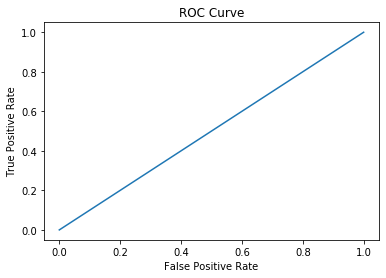

In [164]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, pred_tfidf)

roc_auc = roc_auc_score(y_test, pred_tfidf)
print("AUC of ROC Curve:", roc_auc)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [165]:
print(classification_report(y_test, pred_tfidf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       207
           1       0.48      1.00      0.65       191

    accuracy                           0.48       398
   macro avg       0.24      0.50      0.32       398
weighted avg       0.23      0.48      0.31       398



C:\Users\ruthv\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
# #def train_and_predict(alpha):
#     # Instantiate the classifier: nb_classifier
#     nb_classifier = MultinomialNB(alpha=alpha)
#     # Fit to the training data
#     nb_classifier.fit(count_train,y_train)
#     # Predict the labels: pred
#     pred = nb_classifier.predict(count_test)
#     # Compute accuracy: score
#     score = metrics.accuracy_score(y_test,pred)
#     return score

In [ ]:
# for alpha in alphas:
#     print('Alpha: ', alpha)
#     print('Score: ', train_and_predict(alpha))
#     print("\n")

In [ ]:
# # Create the list of alphas: alphas
# alphas = np.arange(0,1,0.1)

# # Define train_and_predict()
# def train_and_predict_tfidf(alpha):
#     # Instantiate the classifier: nb_classifier
#     nb_classifier = MultinomialNB(alpha=alpha)
#     # Fit to the training data
#     nb_classifier.fit(tfidf_train,y_train)
#     # Predict the labels: pred
#     pred = nb_classifier.predict(tfidf_test)
#     # Compute accuracy: score
#     score = metrics.accuracy_score(y_test,pred)
#     return score



In [ ]:
# # Iterate over the alphas and print the corresponding score
# for alpha in alphas:
#     print('Alpha: ', alpha)
#     print('Score: ', train_and_predict_tfidf(alpha))
#     print("\n")

In [ ]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0],feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

We now know that Naive Bayes is not an adequate model to use as a classifier

## Fitting a SVM classifier 

In [166]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfidf_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [167]:
pred_tfidf_SVM = SVM.predict(tfidf_test)
score = accuracy_score(pred_tfidf_SVM, y_test)
print(score)

0.5100502512562815


In [168]:
cm = metrics.confusion_matrix(y_test,pred_tfidf_SVM)
cm

array([[ 54, 153],
       [ 42, 149]], dtype=int64)

AUC of ROC Curve: 0.5204871386296381


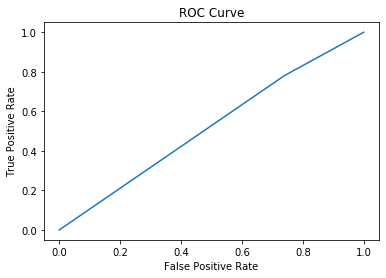

In [169]:
fpr, tpr, thresholds = roc_curve(y_test, pred_tfidf_SVM)

roc_auc = roc_auc_score(y_test, pred_tfidf_SVM)
print("AUC of ROC Curve:", roc_auc)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [170]:
print(classification_report(y_test,pred_tfidf_SVM))

              precision    recall  f1-score   support

           0       0.56      0.26      0.36       207
           1       0.49      0.78      0.60       191

    accuracy                           0.51       398
   macro avg       0.53      0.52      0.48       398
weighted avg       0.53      0.51      0.48       398



In [171]:
SVM.fit(count_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [172]:
pred_count_SVM = SVM.predict(count_test)
score = accuracy_score(pred_count_SVM, y_test)
print(score)

0.5150753768844221


In [173]:
cm = metrics.confusion_matrix(y_test,pred_count_SVM)
cm

array([[ 95, 112],
       [ 81, 110]], dtype=int64)

AUC of ROC Curve: 0.5174267142170625


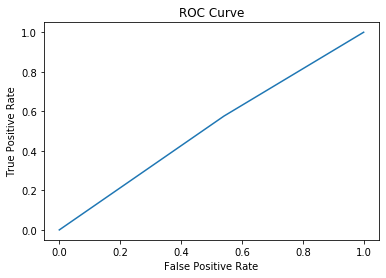

In [174]:
fpr, tpr, thresholds = roc_curve(y_test, pred_count_SVM)

roc_auc = roc_auc_score(y_test, pred_count_SVM)
print("AUC of ROC Curve:", roc_auc)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
print(classification_report(y_test,pred_count_SVM))

## Fitting a Linear Discriminant Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
# prepare the model LDA

tfidf_lda_vect = TfidfVectorizer(max_features = 50000)

X_train_lda = tfidf_lda_vect.fit_transform(X_train).toarray()
X_test_lda = tfidf_lda_vect.transform(X_test).toarray()

In [ ]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train_lda,y_train)
# estimate accuracy on validation dataset

In [ ]:
pred_tfidf_lda = model_lda.predict(X_test_lda)
print("accuracy score:")
print(accuracy_score(y_test, pred_tfidf_lda))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred_tfidf_lda))
print("classification report: ")
print(classification_report(y_test, pred_tfidf_lda))

In [ ]:
count_lda_vect = CountVectorizer(max_df = 0.7, ngram_range = (1,2))
X_train_count_lda = count_lda_vect.fit_transform(X_train).toarray()
X_test_count_lda = count_lda_vect.transform(X_test).toarray()

In [ ]:
model_lda.fit(X_train_count_lda,y_train)

pred_count_lda = model_lda.predict(X_test_count_lda)
print("accuracy score:")
print(accuracy_score(y_test, pred_count_lda))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred_count_lda))
print("classification report: ")
print(classification_report(y_test, pred_count_lda))

## Fitting a K Nearest Neighbours model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
count_lda_vect = CountVectorizer(max_df = 0.7,ngram_range = (1,2))
X_train_count_knn = count_lda_vect.fit_transform(X_train)
X_test_count_knn= count_lda_vect.transform(X_test)

In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_count_knn, y_train)
pred_knn = knn.predict(X_test_count_knn)
print("accuracy score:")
print(accuracy_score(y_test, pred_knn))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred_knn))
print("classification report: ")
print(classification_report(y_test, pred_knn))

In [ ]:
tfidf_lda_vect = TfidfVectorizer(max_features = 75000, ngram_range = (1,2))
X_train_tfidf_knn = tfidf_lda_vect.fit_transform(X_train)
X_test_tfidf_knn= tfidf_lda_vect.transform(X_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_tfidf_knn, y_train)
pred_knn_tfidf = knn.predict(X_test_tfidf_knn)
print("accuracy score:")
print(accuracy_score(y_test, pred_knn_tfidf))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred_knn_tfidf))
print("classification report: ")
print(classification_report(y_test, pred_knn_tfidf))

## Fitting a Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

count_lda_vect = CountVectorizer(max_df = 0.7)
count_lda_vect.fit(data_1['text_final'])
X_train_count_knn = count_lda_vect.transform(X_train).toarray()
X_test_count_knn= count_lda_vect.transform(X_test).toarray()

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=150)
gbm.fit(X_train_count_knn, y_train)
pred_gbm = gbm.predict(X_test_count_knn)
print("accuracy score:")
print(accuracy_score(y_test, pred_gbm))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred_gbm))
print("classification report: ")
print(classification_report(y_test, pred_gbm))

## Fitting a bagging model with KNN

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(KNeighborsClassifier(n_neighbors = 10))
bag_model.fit(X_train_count_gbm,y_train)
pred_bag = bag_model.predict(X_test_count_gbm)
print("accuracy score:")
print(accuracy_score(y_test, pred_bag))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred_bag))
print("classification report: ")
print(classification_report(y_test, pred_bag))

## Fitting a bagging model with SVM

In [120]:
bag_model_svm = BaggingClassifier(svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'))
bag_model_svm.fit(X_train_count_gbm,y_train)
pred_bag_svm = bag_model_svm.predict(X_test_count_gbm)
print("accuracy score:")
print(accuracy_score(y_test, pred_bag_svm))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred_bag_svm))
print("classification report: ")
print(classification_report(y_test, pred_bag_svm))

NameError: name 'BaggingClassifier' is not defined

## Fitting a Decision tree Classifier

In [ ]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train_count_knn, y_train)
pred_dtc = dtc.predict(X_test_count_knn)
print("accuracy score:")
print(accuracy_score(y_test, pred_dtc))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred_dtc))
print("classification report: ")
print(classification_report(y_test, pred_dtc))

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Fitting a Random Forrest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 250, max_features = 1000)
rf.fit(X_train_count_knn, y_train)
pred_rf = rf.predict(X_test_count_knn)
print("accuracy score:")
print(accuracy_score(y_test, pred_rf))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred_rf))
print("classification report: ")
print(classification_report(y_test, pred_rf))

# Building a Deep Neural Network for classification

In [ ]:
import tensorflow
from keras.layers import  Dropout, Dense
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics

In [ ]:
tfidf_nn = TfidfVectorizer(max_features=50000)
tfidf_nn.fit(data_1['text_final'])
X_train = tfidf_nn.transform(X_train).toarray()
X_test = tfidf_nn.transform(X_test).toarray()

In [ ]:
print("tf-idf with",str(np.array(X_train).shape[1]),"features")

In [ ]:
"""
    Build_Model_DNN_Text(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
"""

def Build_Model_DNN_Text(shape, nClasses, dropout=0.5):

    model = Sequential()
    node = 1024 # number of nodes
    nLayers = 5 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:

model_DNN = Build_Model_DNN_Text(X_train.shape[1], 2)
model_DNN.fit(X_train, y_train,
                              validation_data=(X_test, y_test),
                              epochs=10,
                              batch_size=128,
             )
predicted = model_DNN.predict(X_test)


## Using n-grams to generate feature vectors

In [175]:
bigram_count = CountVectorizer(ngram_range = (1,2))
bi_count_train = bigram_count.fit_transform(X_train)
bi_count_test = bigram_count.transform(X_test)

In [176]:
SVM_bi_count = svm.SVC(C=1.0, kernel = 'linear', gamma='auto')
SVM_bi_count.fit(bi_count_train,y_train)

pred_bi_svm = SVM_bi_count.predict(bi_count_test)
print("accuracy score:")
print(accuracy_score(y_test, pred_bi_svm))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred_bi_svm))
print("classification report: ")
print(classification_report(y_test, pred_bi_svm))

accuracy score:
0.5175879396984925
confusion matrix: 
[[ 87 120]
 [ 72 119]]
classification report: 
              precision    recall  f1-score   support

           0       0.55      0.42      0.48       207
           1       0.50      0.62      0.55       191

    accuracy                           0.52       398
   macro avg       0.52      0.52      0.51       398
weighted avg       0.52      0.52      0.51       398



In [177]:
trigram_count = CountVectorizer(ngram_range = (1,4))
tri_count_train = trigram_count.fit_transform(X_train)
tri_count_test = trigram_count.transform(X_test)

In [178]:
SVM_tri_count = svm.SVC(C = 1.0, kernel = 'linear' ,gamma = 'auto')
SVM_tri_count.fit(tri_count_train,y_train)

pred_tri_svm = SVM_tri_count.predict(tri_count_test)
print("accuracy score:")
print(accuracy_score(y_test, pred_tri_svm))
print("confusion matrix: ")
print(metrics.confusion_matrix(y_test, pred_tri_svm))
print("classification report: ")
print(classification_report(y_test, pred_tri_svm))

accuracy score:
0.5201005025125628
confusion matrix: 
[[ 67 140]
 [ 51 140]]
classification report: 
              precision    recall  f1-score   support

           0       0.57      0.32      0.41       207
           1       0.50      0.73      0.59       191

    accuracy                           0.52       398
   macro avg       0.53      0.53      0.50       398
weighted avg       0.54      0.52      0.50       398



# Hyperparameter Tuning

## GridSearch using Logistic Regression

In [179]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [180]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(bi_count_train,y_train)


C:\Users\ruthv\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ruthv\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\ruthv\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFail

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']},
 

In [181]:
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 1e-05, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.549340509847992


## GridSearch using SVM

In [ ]:
# Create the hyperparameter grid
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}

svm_cv = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=5)
svm_cv.fit(bi_count_train, y_train)

In [ ]:
# Print the optimal parameters and best score
print("Tuned SVM Parameter: {}".format(svm_cv.best_params_))
print("Tuned SVM Accuracy: {}".format(svm_cv.best_score_))

## GridSearch using KNN

In [ ]:
# Create the hyperparameter grid
n_neighbours = [3,5,9,10,  11,15, 17, 19, 25, 35]

param_grid = {'n_neighbors': n_neighbours}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(bi_count_train, y_train)

In [ ]:
# Print the optimal parameters and best score
print("Tuned KNN Parameter: {}".format(knn_cv.best_params_))
print("Tuned KNN Accuracy: {}".format(knn_cv.best_score_))

## GridSearch using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create the hyperparameter grid
param_grid = {'max_leaf_nodes': [2,3]}

dtc = DecisionTreeClassifier()
dtc_cv =GridSearchCV(dtc, param_grid, cv=5)
dtc_cv.fit(bi_count_train,y_train)

In [ ]:
# Print the optimal parameters and best score
print("Tuned Decision Tree Parameter: {}".format(dtc_cv.best_params_))
print("Tuned Decision Tree Accuracy: {}".format(dtc_cv.best_score_))

In [ ]:
bi_count_train.shape

## Dimensionality Reduction using Chi2

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(max_features=50000,ngram_range=(1, 3))
trigram_train_tfidf = tvec.fit_transform(X_train)
trigram_test_tfidf = tvec.transform(X_test)
chi2score = chi2(trigram_train_tfidf, y_train)[0]

In [ ]:
plt.figure(figsize=(15,10))
wscores = list(zip(tvec.get_feature_names(), chi2score))
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
ch2_result = []
for n in np.arange(10000,50000,10000):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(trigram_train_tfidf, y_train)
    x_test_chi2_selected = ch2.transform(trigram_test_tfidf)
    clf = LogisticRegression()
    clf.fit(x_train_chi2_selected, y_train)
    score = clf.score(x_test_chi2_selected, y_test)
    ch2_result.append(score)
    print ("chi2 feature selection evaluation calculated for {} features and score is {}".format(n, score))

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(np.arange(10000,50000,10000), ch2_result,label='tfidf dimesions reduced from 100,000 features',linestyle=':', color='orangered')

plt.title("tfidft vectorizer: features limited within tfidft vectorizer VS reduced dimensions with chi2")
plt.xlabel("Number of features")
plt.ylabel("Test set accuracy")
plt.legend()

## Word2vec embeddings

In [ ]:
import gensim
from gensim import corpora,models ,similarities


In [ ]:
train.wv.vectors.shape
train = gensim.models.Word2Vec(list(data_1['text_final']))

In [ ]:
data_1['text_final']

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
p = train[train.wv.vocab]
pca = PCA(n_components=5)
result = pca.fit_transform(p)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(train.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Running LDA as input to Classification


In [39]:
from nltk import bigrams
from sklearn.model_selection import train_test_spit

y = data['Label']

train1_data = data[data['date']<''
 X_test1 = data['combined']

In [40]:
print(len(X_train1))

1591


In [41]:
processed_train = X_train1.map(preprocess)
processed_train[:10]


1275    [omanian, govern, chang, environ, allow, canad...
1915    [ari, attack, suspect, salah, abdeslam, shoot,...
171     [monsanto, uproot, germani, ban, cultiv, corn,...
0       [georgia, down, russian, warplan, countri, bri...
1934    [wit, disappear, mexican, student, tell, inves...
1394    [egyptian, govern, resign, resid, yoweri, muse...
1315    [buy, bitcoin, forget, find, theyr, worth, buy...
955     [ndian, state, forest, guard, shoot, poacher, ...
218     [site, show, pictur, protest, identif, basij, ...
706     [gribusi, win, brazil, away, law, protect, lar...
Name: combined, dtype: object

In [42]:
print(len(processed_train))

dictionary_train = gensim.corpora.Dictionary(processed_train)
count = 0
for k, v in dictionary_train.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

1591
0 accord
1 activist
2 adversari
3 affair
4 agenc
5 aljazeera
6 allow
7 alqaeda
8 ancient
9 anger
10 antigovern


In [43]:
dictionary_train.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus_train = [dictionary_train.doc2bow(doc) for doc in processed_train]

from gensim import corpora, models
tfidf_train = models.TfidfModel(bow_corpus_train)
corpus_tfidf_train = tfidf_train[bow_corpus_train]
from pprint import pprint
for doc in corpus_tfidf_train:
    pprint(doc)
    break


[(0, 0.04126227641607503),
 (1, 0.07754211046648674),
 (2, 0.0795772622213366),
 (3, 0.042248760441639055),
 (4, 0.09351337529258369),
 (5, 0.03260862607105225),
 (6, 0.15729872349328586),
 (7, 0.06093499154933629),
 (8, 0.06382174597494118),
 (9, 0.09351337529258369),
 (10, 0.08155506607343319),
 (11, 0.050566594644215375),
 (12, 0.07819924000506097),
 (13, 0.02262564254637399),
 (14, 0.13211865742701126),
 (15, 0.08611639228408775),
 (16, 0.04188506620021103),
 (17, 0.04048583035182606),
 (18, 0.10317114243510064),
 (19, 0.06478914325393462),
 (20, 0.030165809682856),
 (21, 0.02321302420089604),
 (22, 0.07819924000506097),
 (23, 0.04376468240435906),
 (24, 0.1045491646513763),
 (25, 0.0842969891089394),
 (26, 0.07819924000506097),
 (27, 0.031269444168181795),
 (28, 0.03487725138532779),
 (29, 0.040316830278483685),
 (30, 0.062002342799792845),
 (31, 0.04528398309694859),
 (32, 0.06358619562708491),
 (33, 0.03315491043159653),
 (34, 0.09351337529258369),
 (35, 0.17974656002685707),
 (

In order to train a LDA model we need to provide a fixed assume number of topics across your corpus. There are a number of ways you could approach this:

1) Run LDA on your corpus with different numbers of topics and see if word distribution per topic looks sensible.

2) Examine the coherence scores of your LDA model, and effectively grid search to choose the highest coherence [4].

3) Create a handful of LDA models with different topic values, then see how these perform in the supervised classification model training. This is specific to my goals here, since my ultimate aim is to see if the topic distributions have predictive value.

In [47]:
import gensim
import logging # This allows for seeing if the model converges. A log file is created.
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=bow_corpus_train,
                           num_topics=5,
                           id2word=dictionary_train,
                           chunksize=100,
                           workers=5, # Num. Processing Cores - 1
                           passes=20,
                           eval_every = 1,
                           per_word_topics=True)
lda_train.save('lda_train.model')

In [48]:
#for idx, topic in lda_train.print_topics(-1):
#    print('Topic: {} \nWords: {}'.format(idx, topic))

In [49]:
lda_train.print_topics(,num_words=15)[:10]

[(0,
  '0.014*"israel" + 0.010*"isra" + 0.007*"gaza" + 0.006*"iran" + 0.006*"palestinian" + 0.005*"china" + 0.004*"death" + 0.004*"afghanistan" + 0.004*"bank" + 0.004*"protest" + 0.004*"right" + 0.003*"pakistan" + 0.003*"presid" + 0.003*"children" + 0.003*"british"'),
 (1,
  '0.004*"korea" + 0.004*"million" + 0.003*"offici" + 0.003*"syria" + 0.003*"plan" + 0.003*"presid" + 0.003*"court" + 0.003*"islam" + 0.003*"call" + 0.003*"china" + 0.003*"nation" + 0.003*"time" + 0.003*"forc" + 0.003*"minist" + 0.003*"hina"'),
 (2,
  '0.024*"snowden" + 0.011*"spi" + 0.010*"russia" + 0.008*"edward" + 0.007*"georgia" + 0.006*"surveil" + 0.006*"secret" + 0.006*"russian" + 0.006*"protest" + 0.005*"leak" + 0.004*"nowden" + 0.004*"agenc" + 0.004*"whistleblow" + 0.004*"drug" + 0.004*"presid"'),
 (3,
  '0.013*"ukrain" + 0.011*"russia" + 0.008*"russian" + 0.006*"korea" + 0.006*"militari" + 0.005*"forc" + 0.005*"ussia" + 0.005*"protest" + 0.005*"krain" + 0.004*"assang" + 0.004*"minist" + 0.004*"border" + 0.00

In [51]:
train_vecs = []
for i in range(len(X_train1)):
    top_topics = lda_train.get_document_topics(bow_corpus_train[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(5)]
    #topic_vec.extend([X_train.iloc[i].]) # counts of reviews for restaurant
    #topic_vec.extend([len(rev_train.iloc[i].text)]) # length review
    train_vecs.append(topic_vec)

In [52]:
train_vecs[0]

[0.06734287, 0.7679049, 0.05920004, 0.07503927, 0.030512908]

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_1 = np.array(train_vecs)
y_1 = np.array(y_train1)

logreg = LogisticRegression()

scores = cross_val_score(logreg, X_1, y_1, cv=6)

print('Logistic Regression Scores:', scores)

Logistic Regression Scores: [0.55263158 0.55263158 0.55263158 0.55471698 0.5530303  0.5530303 ]


C:\Users\ruthv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ruthv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ruthv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ruthv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ruthv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [55]:
print('Logistic Regression Scores:', np.mean(scores[0:2]))

Logistic Regression Scores: 0.5526315789473685


In [ ]:
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt
predictions = cross_val_predict(logreg,X_1,y_1,cv=6)
print(accuracy_score(predictions,y_1))

In [2]:
pip install Merge

Note: you may need to restart the kernel to use updated packages.


In [182]:
pred = logreg.predict(scaled_test,y_test)

NameError: name 'scaled_test' is not defined